<a href="https://colab.research.google.com/github/eirenengoc/covid_impacts_on_digital_learning/blob/main/Final_Project_May_9th_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

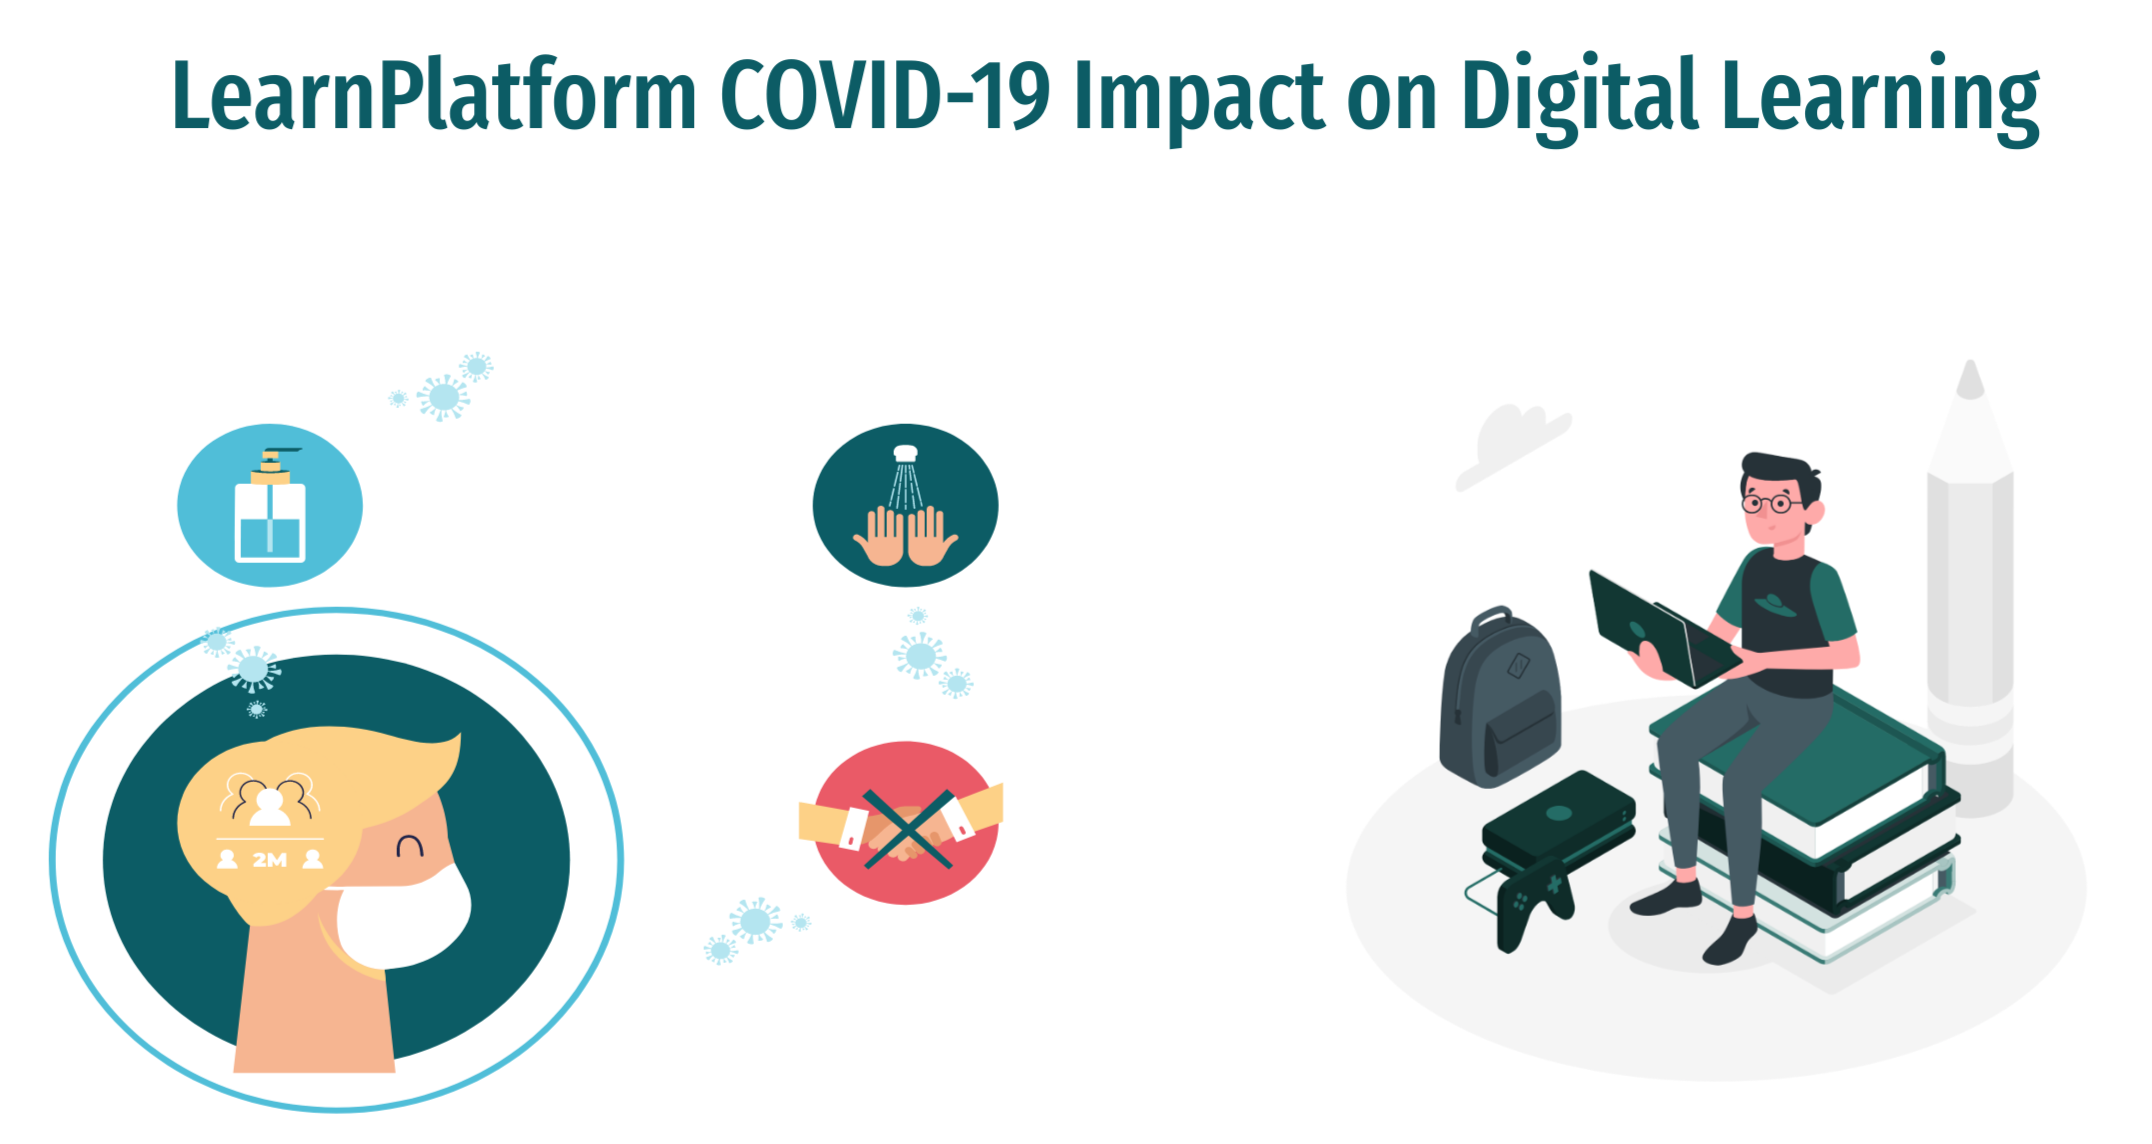

## **Overview and define Big Question**
 - What products are the most used for digital learning in covid time ?  And why these products are used ?
 - How the impact of district and properties in district to product access and engagement during covid - 19 Spread in 2020?
 -  What is the functions of products to attract the users? Why the function attract the users during covid - 19?

# **1.Colect and Clean Data**

In [1]:
# Create the connection between google colab and google drive
from google.colab import drive
drive.mount('/content/drive')

# Attach the library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
# Import District_info Data and Product_info Data
district = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/2-districts_info.csv')
product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/products_info.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Create district_id list
district_id = district['district_id'].tolist()
# Create dictionary of link and name
link =[]
name = []
drive_link = '/content/drive/MyDrive/Colab Notebooks/Final Project/'
for i in range(len(district_id)):
  new_link = drive_link + str(district_id[i])+'.csv'
  new_name = 'E' + str(district_id[i])
  link.append(new_link)
  name.append(new_name)
# Read Engagement CSV files (Include 233 files)
  name[i] = pd.read_csv(link[i])
# Input district id columns for engagement tables
  name[i]['dist_id'] = district_id[i]

In [3]:
# Create Engagement table
Engagement = name[0]
for i in range(len(district_id)-1):  
    i +=1
    Engagement = pd.concat([Engagement,name[i]], axis = 0)

In [4]:
# The total number of rows of 233 concatenating files corresponding to more than 22 millions of rows
Engagement.shape

(22324190, 5)

### **1.1. Clean Engagement Table**

In [5]:
# Change time column to datetime format
Engagement['time'] = pd.to_datetime(Engagement['time'])

# Add Product Name, Date of the week & Month and state columns
Engagement = pd.merge(Engagement, product[['LP ID','Product Name']], left_on = 'lp_id', right_on = 'LP ID', how ='left').drop(columns =('LP ID'))
Engagement['date_of_the_week'] = Engagement['time'].dt.day_name()
Engagement['month'] = pd.DatetimeIndex(Engagement['time']).month
Engagement = pd.merge(Engagement, district[['district_id','state']], left_on = 'dist_id', right_on = 'district_id', how ='left').drop(columns =('district_id'))
# fill mean_value for pct_access and engagement_index
Engagement['pct_access'].fillna(Engagement['pct_access'].mean(),inplace = True)
Engagement['engagement_index'].fillna(Engagement['engagement_index'].mean(),inplace = True)

# Add state columns for Engagement table
Engagement= Engagement.dropna()
Engagement.head(3)

,time,lp_id,pct_access,engagement_index,dist_id,Product Name,date_of_the_week,month,state
0,2020-01-27,32213.0,100.00,3000.000000,8815,Google Classroom,Monday,1,Illinois
1,2020-02-25,90153.0,33.33,2666.670000,8815,Netflix,Tuesday,2,Illinois
2,2020-02-25,99916.0,0.00,167.606264,8815,Google Drive,Tuesday,2,Illinois


In [6]:
Engagement.isnull().sum()

time                0
lp_id               0
pct_access          0
engagement_index    0
dist_id             0
Product Name        0
date_of_the_week    0
month               0
state               0
dtype: int64

## **1.2. Clean District Information Table**

In [7]:
# Review district table
district.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop Unnamed: 7 column
# district.drop(columns = ['Unnamed: 7'], inplace = True)

In [9]:
# Fill in '[0,0[' for pct_black/hispanic - pct_free/reduced - county_connections_ratio - pp_total_raw
district[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']] = district[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']].fillna('[0,0[')
district.rename(columns = {'district_id' : 'dist_id'}, inplace = True)
district

,dist_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,"[0,0[","[0,0[","[0,0[","[0,0["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,"[0,0[","[0,0[","[0,0[","[0,0["
4,2238,NaN,NaN,"[0,0[","[0,0[","[0,0[","[0,0["
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[","[0,0[","[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[","[0,0["


In [10]:
district.dropna(axis = 0, inplace = True)
district

,dist_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[","[0,0[","[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[","[0,0["


In [11]:
# Convert arrays of values in each column into interger and float numbers

for i in ['pct_black/hispanic', 'pct_free/reduced', 'county_connections_ratio']:

# Take the mean value of each column by adding to its'step (depending on "Unit of column") with the initial values

    district[i] = district[i].apply(lambda x: float(str(x).split(',')[0].split('[')[1]) + 0.1)   

# The median value to represent the expenditure of a given school district

district['pp_total_raw'] = district['pp_total_raw'].apply(lambda x: int(x.split(',')[0].split('[')[1]) + 1000)

# According to the given statistics data, the county-data-internet-access-services are always stable at the equal level
# Therefore, this data can be dropped in the data cleaning process

district.drop(columns = ['county_connections_ratio'], inplace = True)
district

,dist_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,15000
2,4921,Utah,Suburb,0.1,0.3,7000
5,5987,Wisconsin,Suburb,0.1,0.1,11000
6,3710,Utah,Suburb,0.1,0.5,7000
7,7177,North Carolina,Suburb,0.3,0.3,9000
...,...,...,...,...,...,...
228,9515,New York,Rural,0.1,0.5,19000
229,8103,Tennessee,Rural,0.3,0.1,9000
230,4929,Virginia,Rural,0.1,0.5,13000
231,7975,California,City,0.7,0.7,1000


In [12]:
district.isna().sum() 

dist_id               0
state                 0
locale                0
pct_black/hispanic    0
pct_free/reduced      0
pp_total_raw          0
dtype: int64

## **1.3. Clean Product Information Table**

In [13]:
# Remove URL
product.drop(columns=['URL'], inplace = True)

# Rename LP ID to lp_id
product.rename(columns = {'LP ID':'lp_id'}, inplace = True)

# Fillna information for non-values
product.fillna('No information', inplace = True)  

# Create new column for main category function of product
# When using apply function to any column, the missing values must be a full entity-form
product['Main Category Function'] = product['Primary Essential Function'].apply(lambda x: x.split(' - ')[0])
# Function check sub category function
def check_sub(row):
  row = row.split(' - ')[1:len(row.split(' - '))]
  return str(row).strip('''['']''')
product['Sub Category Function'] = product['Primary Essential Function'].apply(check_sub)

product.head()

,lp_id,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Main Category Function,Sub Category Function
0,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
1,66933,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
2,50479,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference', 'Games & Simula..."
3,92993,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms
4,73104,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms


## **1.4. Clean and create confirmed and deaths information**

In [14]:
# Import state information and confirmed table
confirmed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/covid_confirmed_usafacts.csv')
death = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/covid_deaths_usafacts.csv')
state = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/state_information.csv')

# Create State information
state = state[['state','code']]
state.rename(columns = {'code':'State'}, inplace = True)
state = state.dropna()

# Create date_list
date = confirmed.columns.tolist()

# Create new date list
date = date[4:348]

# drop unnecesary columns of confirmed
confirmed.drop(columns = ['StateFIPS', 'countyFIPS','County Name'], inplace = True)
# drop unnecesary columns of death
death.drop(columns = ['StateFIPS', 'countyFIPS','County Name'], inplace = True)

# Reset index of confirmed table
confirmed.reset_index(inplace = True)
# Reset index of death table
death.reset_index(inplace = True)

# Groupby state and sum case of confirmed
confirmed = confirmed.groupby('State')[date].sum().reset_index()
# Group by state and sum case of death
death = death.groupby('State')[date].sum().reset_index()

# Create new confirmed
new_confirmed = pd.merge(state,confirmed, how = 'left', on = 'State')
new_confirmed.drop(columns=['State'], inplace = True)
# Create new death table
new_death = pd.merge(state,death, how = 'left', on = 'State')
new_death.drop(columns=['State'], inplace = True)


## **1.5. Merge Table**

In [15]:
# Merging Engagement and District Tables
Engagement_District = pd.merge(Engagement, district, how = 'left', on = 'dist_id')
Engagement_District.dropna(inplace = True)
Engagement_District

,time,lp_id,pct_access,engagement_index,dist_id,Product Name,date_of_the_week,month,state_x,state_y,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,2020-01-27,32213.0,100.00,3000.000000,8815,Google Classroom,Monday,1,Illinois,Illinois,Suburb,0.1,0.1,15000
1,2020-02-25,90153.0,33.33,2666.670000,8815,Netflix,Tuesday,2,Illinois,Illinois,Suburb,0.1,0.1,15000
2,2020-02-25,99916.0,0.00,167.606264,8815,Google Drive,Tuesday,2,Illinois,Illinois,Suburb,0.1,0.1,15000
3,2020-02-25,28504.0,0.00,167.606264,8815,Google Sheets,Tuesday,2,Illinois,Illinois,Suburb,0.1,0.1,15000
4,2020-02-25,95731.0,33.33,333.330000,8815,Google Docs,Tuesday,2,Illinois,Illinois,Suburb,0.1,0.1,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139696,2020-12-31,28504.0,0.05,10.460000,7164,Google Sheets,Thursday,12,California,California,City,0.7,0.7,1000
9139697,2020-12-31,69827.0,0.35,24.810000,7164,Google Sites,Thursday,12,California,California,City,0.7,0.7,1000
9139698,2020-12-31,52758.0,0.01,0.090000,7164,Adobe Character Animator,Thursday,12,California,California,City,0.7,0.7,1000
9139699,2020-12-31,61945.0,0.29,16.060000,7164,Zoom,Thursday,12,California,California,City,0.7,0.7,1000


In [16]:
# Merging Engagement and Product Tables
Engagement_Product = pd.merge(Engagement, product, how = 'left', on = 'lp_id')
Engagement_Product.fillna('No Information', inplace = True)
Engagement_Product

,time,lp_id,pct_access,engagement_index,dist_id,Product Name_x,date_of_the_week,month,state,Product Name_y,Provider/Company Name,Sector(s),Primary Essential Function,Main Category Function,Sub Category Function
0,2020-01-27,32213.0,100.00,3000.000000,8815,Google Classroom,Monday,1,Illinois,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS)
1,2020-02-25,90153.0,33.33,2666.670000,8815,Netflix,Tuesday,2,Illinois,Netflix,Netflix,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",LC,"Sites, Resources & Reference', 'Streaming Serv..."
2,2020-02-25,99916.0,0.00,167.606264,8815,Google Drive,Tuesday,2,Illinois,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,LC/CM/SDO,Other
3,2020-02-25,28504.0,0.00,167.606264,8815,Google Sheets,Tuesday,2,Illinois,Google Sheets,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,LC/CM/SDO,Other
4,2020-02-25,95731.0,33.33,333.330000,8815,Google Docs,Tuesday,2,Illinois,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,LC,Content Creation & Curation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139696,2020-12-31,28504.0,0.05,10.460000,7164,Google Sheets,Thursday,12,California,Google Sheets,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,LC/CM/SDO,Other
9139697,2020-12-31,69827.0,0.35,24.810000,7164,Google Sites,Thursday,12,California,Google Sites,Google LLC,PreK-12; Higher Ed; Corporate,"SDO - Data, Analytics & Reporting - Site Hosti...",SDO,"Data, Analytics & Reporting', 'Site Hosting & ..."
9139698,2020-12-31,52758.0,0.01,0.090000,7164,Adobe Character Animator,Thursday,12,California,Adobe Character Animator,Adobe Inc.,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,LC,Content Creation & Curation
9139699,2020-12-31,61945.0,0.29,16.060000,7164,Zoom,Thursday,12,California,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...,CM,"Virtual Classroom', 'Video Conferencing & Scre..."


In [17]:
Engagement_Product.isna().sum()

time                          0
lp_id                         0
pct_access                    0
engagement_index              0
dist_id                       0
Product Name_x                0
date_of_the_week              0
month                         0
state                         0
Product Name_y                0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
Main Category Function        0
Sub Category Function         0
dtype: int64

In [18]:
# Merging Engagement_District and Product Tables
Engagement_District_Product = pd.merge(Engagement_District, product, how = 'left', on = 'lp_id')
Engagement_District_Product.dropna(inplace = True)
Engagement_District_Product.drop(columns = ['Product Name_x','state_x', 'state_y'], inplace = True)
Engagement_District_Product.rename(columns = {'Product Name_y' : 'Product Name'}, inplace = True)
Engagement_District_Product

,time,lp_id,pct_access,engagement_index,dist_id,date_of_the_week,month,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Main Category Function,Sub Category Function
0,2020-01-27,32213.0,100.00,3000.000000,8815,Monday,1,Suburb,0.1,0.1,15000,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS)
1,2020-02-25,90153.0,33.33,2666.670000,8815,Tuesday,2,Suburb,0.1,0.1,15000,Netflix,Netflix,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",LC,"Sites, Resources & Reference', 'Streaming Serv..."
2,2020-02-25,99916.0,0.00,167.606264,8815,Tuesday,2,Suburb,0.1,0.1,15000,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,LC/CM/SDO,Other
3,2020-02-25,28504.0,0.00,167.606264,8815,Tuesday,2,Suburb,0.1,0.1,15000,Google Sheets,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,LC/CM/SDO,Other
4,2020-02-25,95731.0,33.33,333.330000,8815,Tuesday,2,Suburb,0.1,0.1,15000,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,LC,Content Creation & Curation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139696,2020-12-31,28504.0,0.05,10.460000,7164,Thursday,12,City,0.7,0.7,1000,Google Sheets,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,LC/CM/SDO,Other
9139697,2020-12-31,69827.0,0.35,24.810000,7164,Thursday,12,City,0.7,0.7,1000,Google Sites,Google LLC,PreK-12; Higher Ed; Corporate,"SDO - Data, Analytics & Reporting - Site Hosti...",SDO,"Data, Analytics & Reporting', 'Site Hosting & ..."
9139698,2020-12-31,52758.0,0.01,0.090000,7164,Thursday,12,City,0.7,0.7,1000,Adobe Character Animator,Adobe Inc.,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,LC,Content Creation & Curation
9139699,2020-12-31,61945.0,0.29,16.060000,7164,Thursday,12,City,0.7,0.7,1000,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...,CM,"Virtual Classroom', 'Video Conferencing & Scre..."


In [19]:
Engagement_District_Product.isna().sum()

time                          0
lp_id                         0
pct_access                    0
engagement_index              0
dist_id                       0
date_of_the_week              0
month                         0
locale                        0
pct_black/hispanic            0
pct_free/reduced              0
pp_total_raw                  0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
Main Category Function        0
Sub Category Function         0
dtype: int64

# **2. Analysis and Find Insight**

# **2.1 Evaluate how Covid affect US's digital learning**

## **2.1.1. Finding the Most Popular Products during school closure**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
No handles with labels found to put in legend.


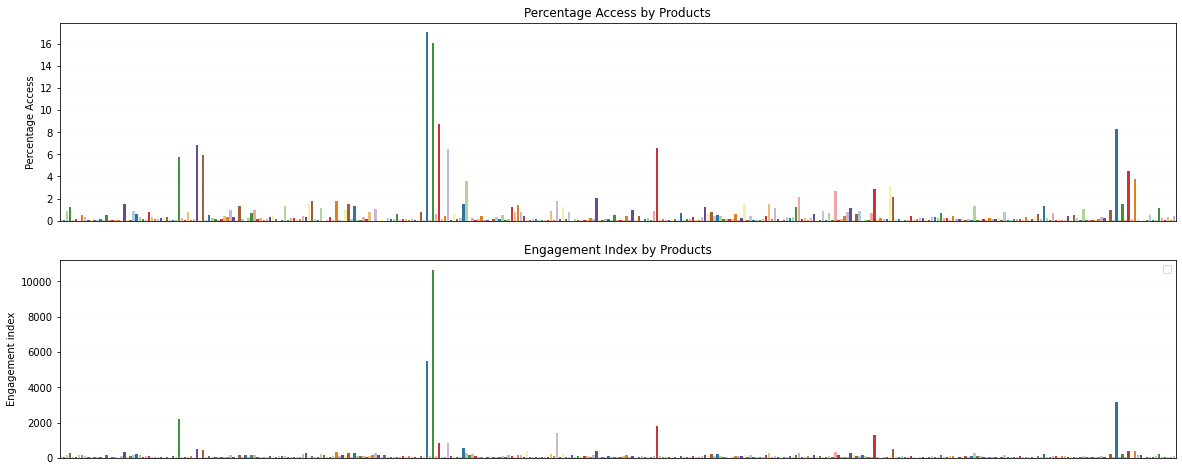

<Figure size 720x576 with 0 Axes>

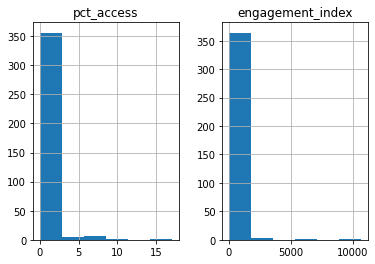

In [20]:
#Create all product list & remove data without product information
all_products_grouped = Engagement.dropna(subset = ["Product Name"]).groupby(['Product Name'])[['pct_access','engagement_index']].mean().reset_index()

#Plot all products' Percentage Access & Engagement Index
all_products_grouped = Engagement.dropna(subset = ["Product Name"]).groupby(['Product Name'])['pct_access','engagement_index'].mean().reset_index()

fig = plt.figure(figsize = (20,8))
plt.subplot(211)
ax = sns.barplot(data= all_products_grouped, x ='Product Name', y = 'pct_access', palette='Paired')
plt.title('Percentage Access by Products')
ax.grid(linewidth = 0.03)
ax.set_xlabel('')
plt.xticks([])
ax.set_ylabel('Percentage Access')

plt.subplot(212)
ax = sns.barplot(data= all_products_grouped, x ='Product Name', y = 'engagement_index', palette='Paired')
plt.title('Engagement Index by Products')
ax.grid(linewidth = 0.03)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
plt.xticks([])
ax.set_ylabel('Engagement index')

plt.show()

#Plot all products'distribution of Percentage Access & Engagement Index'
fig = plt.figure(figsize = (10,8))
all_products_grouped.hist(bins = 6)

plt.show()

As can be seen on the charts, there're a few products that really stood out from the rest in term of User Access and Engagement. We'll try to reduce the number of products to more easily navigate which are these high-performing products

In [21]:
#Find the benchmarks for Top 10% of Percentage Access & Top 10% of Engagement Index products
toprank_tmp = Engagement.dropna(subset = ["Product Name"]).groupby(['Product Name'])['pct_access','engagement_index'].mean()
print(f'Top 90% of Accessing Percentage: {toprank_tmp.pct_access.quantile(0.9)}')
print(f'Top 90% of Engagement Index: {toprank_tmp.engagement_index.quantile(0.9)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Top 90% of Accessing Percentage: 1.2268368635874385
Top 90% of Engagement Index: 199.42666315887638


In [22]:
# Filter Top Rank products that both belong to the Top 10% of Percentage Access & Top 10% of Engagement Index
toprank = toprank_tmp.loc[(toprank_tmp['pct_access'] > 1.21) & (toprank_tmp['engagement_index'] > 199)].reset_index()
toprank 

,Product Name,pct_access,engagement_index
0,ALEKS,1.214124,285.389514
1,Big Ideas Math,1.502331,313.759972
2,Canvas,5.728598,2202.881782
3,ClassLink,6.802866,477.848276
4,Clever,5.895215,417.947992
5,Epic! - Unlimited Books for Kids,1.780610,353.218478
6,ExploreLearning Gizmos,1.519654,245.573108
7,Flipgrid,1.290166,251.102763
8,Google Classroom,17.044563,5485.203971
9,Google Docs,16.048438,10672.336123


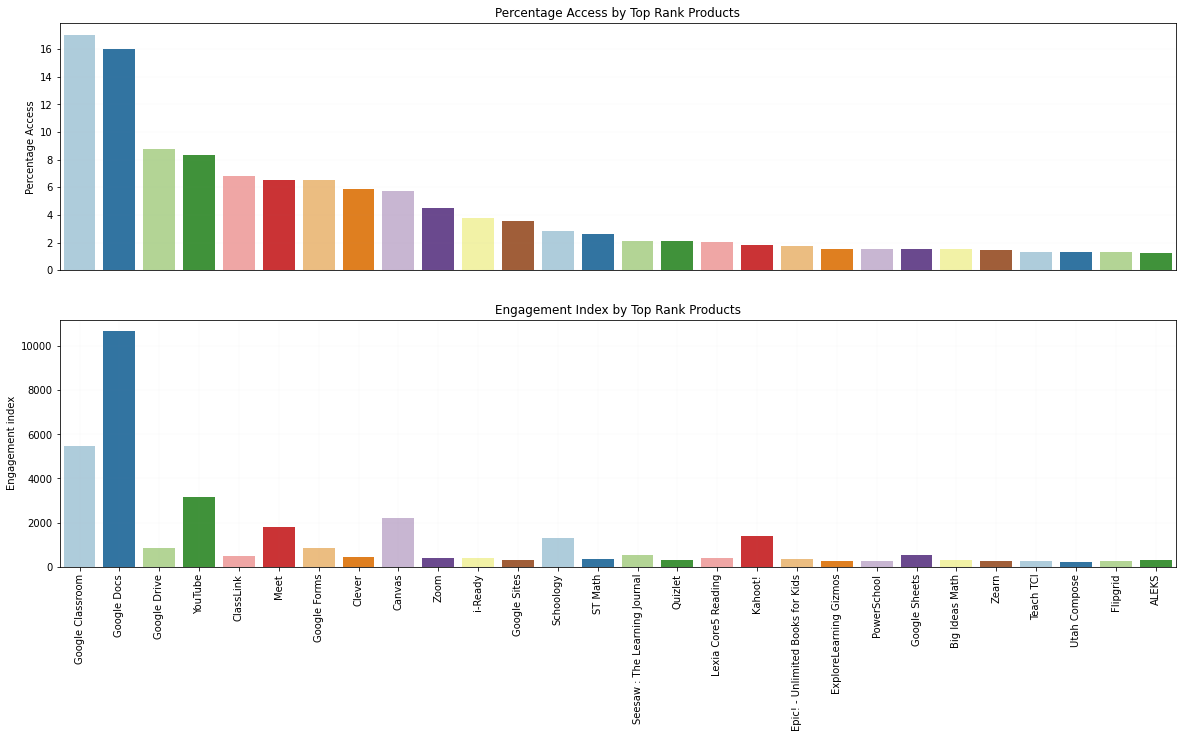

In [23]:
# Visualize Top Rank Product List ordered by Percentage Access
toprank_pct_access =  toprank.sort_values(['pct_access'], ascending = False)

fig = plt.figure(figsize = (20,10))
plt.subplot(211)
ax = sns.barplot(data= toprank_pct_access, x ="Product Name", y = 'pct_access', palette='Paired')
plt.title('Percentage Access by Top Rank Products')
ax.grid(linewidth = 0.03)
ax.set_xlabel('')
plt.xticks([])
ax.set_ylabel('Percentage Access')

# Visualize Top Rank Product List by Engagement Index
plt.subplot(212)
ax = sns.barplot(data= toprank_pct_access, x ="Product Name", y = 'engagement_index', palette='Paired')
plt.title('Engagement Index by Top Rank Products')
ax.grid(linewidth = 0.03)
plt.xticks(rotation = 90)
ax.set_xlabel('')
# ax.set_xticklabels([Toprank_order], rotation = 360)
ax.set_ylabel('Engagement index')

plt.show()

In [24]:
#Get the list of Top 7 Most Popular Products by both Percentage Access & Engagement Index 
top7_tmp = toprank.sort_values(['engagement_index'], ascending = False).head(7).reset_index()
top7_list = top7_tmp['Product Name'].unique()
top7_list 

array(['Google Docs', 'Google Classroom', 'YouTube', 'Canvas', 'Meet',
       'Kahoot!', 'Schoology'], dtype=object)

## **2.1.2. How Covid affected Schools' Overall Engagement in 2020**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


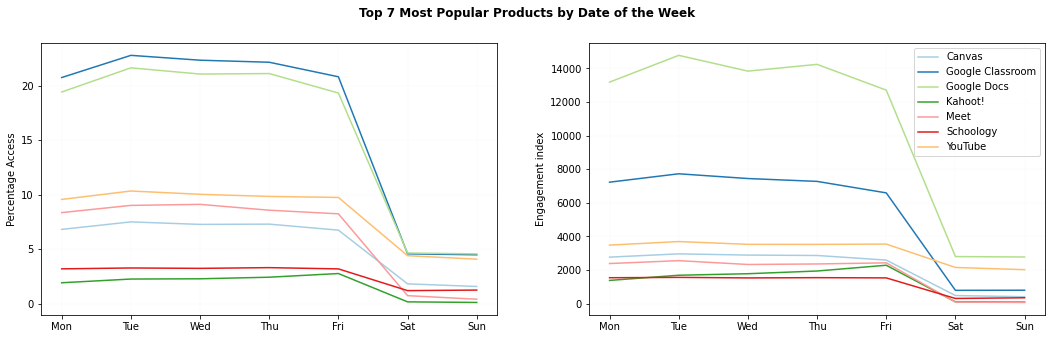

In [25]:
# EVALUATE TOP 7 MOST POPULAR PRODUCTS' PERCENTAGE ACCESS & INGAGEMENT INDEX BY DATE OF THE WEEK
# Get full details of Top 7 Most Popular Product List from Engagement Tables
top7_list_details = Engagement.loc[Engagement['Product Name'].isin(top7_list)].drop(columns = ['lp_id','dist_id'])
top7_weekly = top7_list_details.groupby(['Product Name','date_of_the_week'])['pct_access','engagement_index'].mean().reset_index()

# Sort Date of the Week to the correct order 
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
top7_weekly['date_of_the_week'] = pd.Categorical(top7_weekly.date_of_the_week ,categories= weekdays)
top7_weekly = top7_weekly.sort_values(['Product Name','date_of_the_week'])

# Visualize Top 7 Most Popular Products' Percentage Access & Engagement Index by Date of the Week
fig = plt.figure(figsize = (18,5))
plt.subplot(121)
ax = sns.lineplot(data= top7_weekly, x ='date_of_the_week', y = 'pct_access', hue = "Product Name",palette='Paired', legend = None)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.grid(linewidth = 0.03)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access')

plt.subplot(122)
ax = sns.lineplot(data= top7_weekly, x ='date_of_the_week', y = 'engagement_index', hue = "Product Name", palette='Paired')
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
plt.suptitle("Top 7 Most Popular Products by Date of the Week", fontweight = 'bold')
ax.grid(linewidth = 0.03)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement index')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


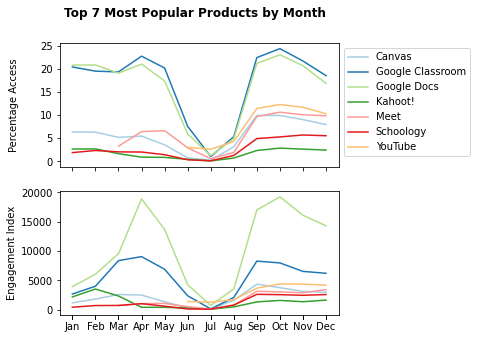

In [26]:
# EVALUATE TOP 7 MOST POPULAR PRODUCTS' PERCENTAGE ACCESS & INGAGEMENT INDEX BY MONTH
top7_monthly = top7_list_details.groupby(['Product Name','month'])['pct_access','engagement_index'].mean().reset_index()
fig = plt.figure(figsize = (5,5))
plt.subplot(211)
ax =sns.lineplot(data= top7_monthly, x ='month', y = 'pct_access', hue = "Product Name",palette='Paired')
ax.set_xticks(top7_monthly['month'].unique())
ax.set_ylabel('Percentage Access', labelpad = 21)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xticklabels('')
ax.set_xlabel('')

plt.subplot(212)
ax =sns.lineplot(data= top7_monthly, x ='month', y = 'engagement_index', hue = "Product Name",palette='Paired', legend = None)
ax.set_xticks(top7_monthly['month'])
ax.set_xticklabels(['Jan','Feb', 'Mar','Apr','May','Jun','Jul', 'Aug','Sep', 'Oct','Nov', 'Dec'], rotation = 360)
plt.suptitle("Top 7 Most Popular Products by Month", fontweight = 'bold')

ax.set_ylabel('Engagement Index')
ax.set_xlabel('')

plt.show()

## **2.1.3. How Covid affected Learning of Open-Ordered & Close-Ordered States**

Since mid-March 2020, most US states gradually closed in-person schools & started online schooling. From the second semester, each state had their own mandates or recommendations on school closure depeding on Covid situation in their states. 

These are 4 most common policies:
1. Full or partial closure ordered by state
2. Hybrid/remote instruction allowed
3. Fulltime or partime in-person instructions ordered by states
4. No order - letting schools/districts deciding

Based on raw tracking data from Education Week, we'll analyze the group states with close-order policy (1 & 2) & the group of states with open-order policy (3) using the Top 7 most popular products's Percentage Access & Engagement Index
- Open Ordered States (Aug - Dec 20): Florida, Texas, Missouri, Iowa, Arkansas
- Ordered Closed States (Full closure/Partial closure > 80% from Aug - Dec 20): California, Delaware, District of Columbia, Hawaii, New Mexico, North Carolina, Puerto Rico, West Virginia

In [27]:
# CREATE TABLE OF OPEN-ORDERED STATES (Florida, Texas, Missouri, Iowa, Arkansas)
#filter Open-ordered States by district id 
open_ordered = district.loc[district['state'].isin(['Florida', 'Texas', 'Missouri','Iowa', 'Arkansas'])].reset_index()
open_ordered_dist = open_ordered['dist_id'].tolist()

# Create Open Ordered csv file
dist_link =[]
dist_name = []

for i in range(len(open_ordered_dist)):
  dist_link_tmp = drive_link + str(open_ordered_dist[i])+'.csv'
  dist_name_tmp = 'E' + str(open_ordered_dist[i])
  dist_link.append(dist_link_tmp)
  dist_name.append(dist_name_tmp)

# Read Open Ordered csv file
  dist_name[i] = pd.read_csv(dist_link[i])

# Input district id columns for Open-ordered State List
  dist_name[i]['dist_id'] = open_ordered_dist[i]

# Create Open Ordered table
open_ordered = dist_name[0]
for i in range(len(open_ordered_dist)-1):  
  i +=1
  open_ordered = pd.concat([open_ordered, dist_name[i]], axis = 0)

# CLEAN OPEN ORDERED TABLE:
# Change time columns to date time format
open_ordered['time'] = pd.to_datetime(open_ordered['time'])
open_ordered['month'] = pd.DatetimeIndex(open_ordered['time']).month
open_ordered['date_of_the_week'] = open_ordered['time'].dt.day_name()

# fill 0 for pct_access and engagement_index
open_ordered['pct_access'].fillna(0,inplace = True)
open_ordered['engagement_index'].fillna(0,inplace = True)

#Add Product Name, Date of the Week, Month columns
open_ordered = pd.merge(open_ordered, product[['lp_id','Product Name']], left_on = 'lp_id', right_on = 'lp_id', how ='left').drop(columns =(['lp_id','time','lp_id','dist_id']))

open_ordered.head(2)

,pct_access,engagement_index,month,date_of_the_week,Product Name
0,0.02,2.26,1,Wednesday,NaN
1,0.01,0.17,1,Wednesday,NaN


In [28]:
# CREATE TABLE OF CLOSE-ORDERED STATES (California, Delaware, District of Columbia, Hawaii, New Mexico, North Carolina, Puerto Rico, West Virginia)
#filter Open-ordered stated by district id 
close_ordered = district.loc[district['state'].isin(['California', 'Delaware', 'District of Columbia', 'Hawaii', 'New Mexico', 'North Carolina', 'Puerto Rico', 'West Virginia'])].reset_index()
close_ordered_dist = close_ordered['dist_id'].tolist()

# Create Open Ordered csv file
dist_link2 =[]
dist_name2 = []

for i in range(len(close_ordered_dist)):
  dist_link_tmp2 = drive_link + str(close_ordered_dist[i])+'.csv'
  dist_name_tmp2 = 'E' + str(close_ordered_dist[i])
  dist_link2.append(dist_link_tmp2)
  dist_name2.append(dist_name_tmp2)

# Read Open Ordered csv file
  dist_name2[i] = pd.read_csv(dist_link2[i])

# Input district id columns for engagement tables
  dist_name2[i]['dist_id'] = close_ordered_dist[i]

# Create Open Ordered table
close_ordered = dist_name2[0]
for i in range(len(close_ordered_dist)-1):  
  i +=1
  close_ordered = pd.concat([close_ordered, dist_name2[i]], axis = 0)

# CLEAN OPEN ORDERED TABLE:
# Change time columns to date time format
close_ordered['time'] = pd.to_datetime(close_ordered['time'])
close_ordered['month'] = pd.DatetimeIndex(close_ordered['time']).month
close_ordered['date_of_the_week'] = close_ordered['time'].dt.day_name()

# fill 0 for pct_access and engagement_index
close_ordered['pct_access'].fillna(0,inplace = True)
close_ordered['engagement_index'].fillna(0,inplace = True)

#Add Product Name, Date of the Week, Month columns
close_ordered = pd.merge(close_ordered, product[['lp_id','Product Name']], left_on = 'lp_id', right_on = 'lp_id', how ='left').drop(columns =(['lp_id','time','lp_id','dist_id']))

close_ordered.head(2)

,pct_access,engagement_index,month,date_of_the_week,Product Name
0,0.02,0.75,1,Wednesday,Google Drive
1,0.00,0.00,1,Wednesday,Frontline Education


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.


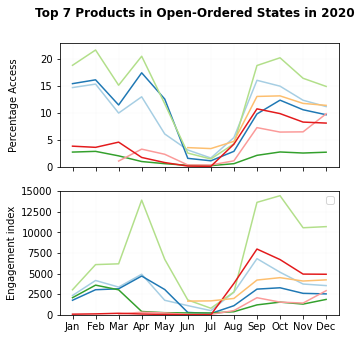

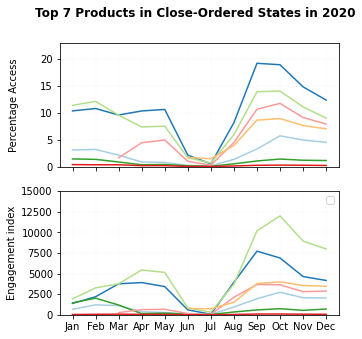

In [29]:
# TOP 7 PRODUCTS BY OPEN-ORDERED & CLOSE-ORDERED STATES BY MONTH
#Get Top 7 Most Popular Products' details in Open-Ordered & Close-Ordered States
top7_open_ordered = open_ordered.loc[open_ordered['Product Name'].isin(top7_list)]
top7_close_ordered = close_ordered.loc[close_ordered['Product Name'].isin(top7_list)]

# Group Top 7 Most Popular Products' details in Open-Ordered & Close-Ordered States by Month
top7_open_ordered_monthly = top7_open_ordered.groupby(['Product Name','month'])['pct_access','engagement_index'].mean().reset_index()
top7_close_ordered_monthly = top7_close_ordered.groupby(['Product Name','month'])['pct_access','engagement_index'].mean().reset_index()

# Visualize Open-Ordered States' Top 7 Most Popular Products' Percentage Access & Engagement Index by Month
fig = plt.figure(figsize = (5,5))
plt.subplot(211)
ax = sns.lineplot(data= top7_open_ordered_monthly, x ='month', y = 'pct_access', hue = "Product Name",palette='Paired', legend = None)
ax.set_xticklabels('')
ax.set_xticks(top7_open_ordered_monthly['month'].unique())
ax.set_ylim(0,23)
ax.grid(linewidth = 0.03)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access',labelpad = 21)

plt.subplot(212)
ax = sns.lineplot(data= top7_open_ordered_monthly, x ='month', y = 'engagement_index', hue = "Product Name",palette='Paired', legend = None)
ax.set_xticklabels(['Jan','Feb', 'Mar','Apr','May','Jun','Jul', 'Aug','Sep', 'Oct','Nov', 'Dec'], rotation = 360)
ax.set_xticks(top7_open_ordered_monthly['month'].unique())
plt.suptitle("Top 7 Products in Open-Ordered States in 2020", fontweight = 'bold')
ax.set_ylim(0,15000)
ax.grid(linewidth = 0.03)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement index')

# Visualize Close-Ordered States' Top 7 Most Popular Products' Percentage Access & Engagement Index by Month
fig = plt.figure(figsize = (5,5))
plt.subplot(211)
ax = sns.lineplot(data= top7_close_ordered_monthly, x ='month', y = 'pct_access', hue = "Product Name",palette='Paired', legend = None)
ax.set_xticklabels("")
ax.set_xticks(top7_close_ordered_monthly['month'].unique())
ax.grid(linewidth = 0.03)
ax.set_ylim(0,23)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access',labelpad = 21)

plt.subplot(212)
ax = sns.lineplot(data= top7_close_ordered_monthly, x ='month', y = 'engagement_index', hue = "Product Name",palette='Paired', legend = None)
ax.set_xticklabels(['Jan','Feb', 'Mar','Apr','May','Jun','Jul', 'Aug','Sep', 'Oct','Nov', 'Dec'], rotation = 360)
ax.set_xticks(top7_close_ordered_monthly['month'].unique())
plt.suptitle("Top 7 Products in Close-Ordered States in 2020", fontweight = 'bold')
ax.set_ylim(0,15000)
ax.grid(linewidth = 0.03)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement index')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


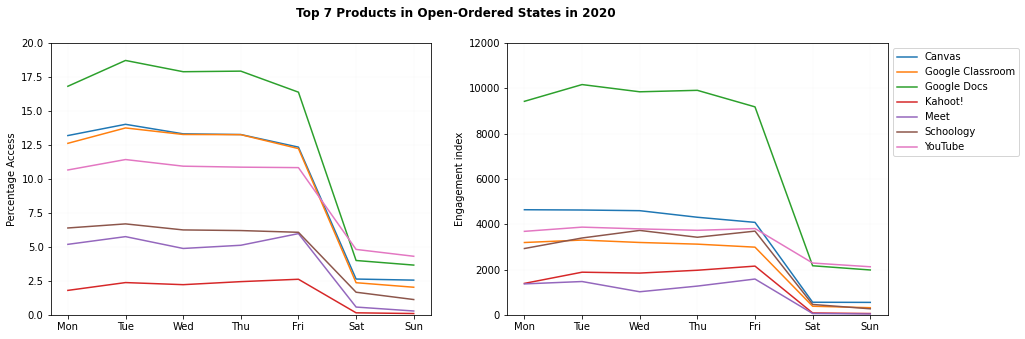

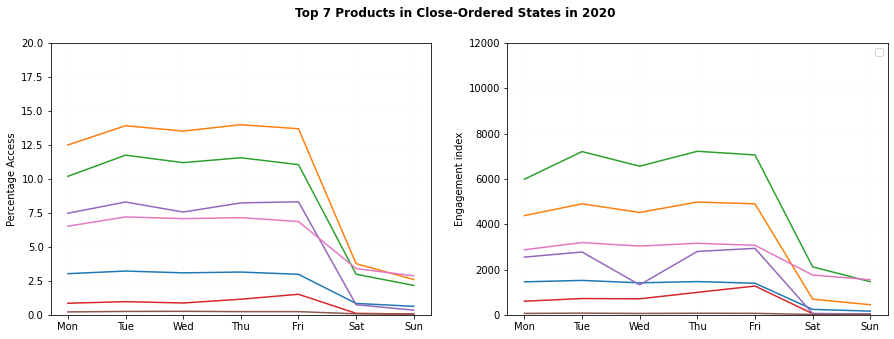

In [30]:
# EVALUATE TOP 7 PRODUCTS BY OPEN-ORDERED & CLOSE-ORDERED STATES BY DATE OF THE WEEK
# Group Top 7 Most Popular Products' details in Open-Ordered & Close-Ordered States by Date of the Week
top7_open_ordered_weekly = top7_open_ordered.groupby(['Product Name','date_of_the_week'])['pct_access','engagement_index'].mean().reset_index()
top7_close_ordered_weekly = top7_close_ordered.groupby(['Product Name','date_of_the_week'])['pct_access','engagement_index'].mean().reset_index()

# Sort Date of the Week to the correct order 
top7_open_ordered_weekly['date_of_the_week'] = pd.Categorical(top7_open_ordered_weekly.date_of_the_week ,categories= weekdays)
top7_open_ordered_weekly = top7_open_ordered_weekly.sort_values(['Product Name','date_of_the_week'])

top7_close_ordered_weekly['date_of_the_week'] = pd.Categorical(top7_close_ordered_weekly.date_of_the_week ,categories= weekdays)
top7_close_ordered_weekly = top7_close_ordered_weekly.sort_values(['Product Name','date_of_the_week'])

# Visualize Open-Ordered States' Top 7 Most Popular Products' Percentage Access & Engagement Index by Date of the Week
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
ax = sns.lineplot(data= top7_open_ordered_weekly, x ='date_of_the_week', y = 'pct_access', hue = "Product Name", legend = None)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.set_xticks(top7_open_ordered_weekly['date_of_the_week'].unique())
ax.grid(linewidth = 0.03)
ax.set_ylim(0,20)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access')

plt.subplot(122)
ax = sns.lineplot(data= top7_open_ordered_weekly, x = 'date_of_the_week', y = 'engagement_index', hue = "Product Name")
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.set_xticks(top7_open_ordered_weekly['date_of_the_week'].unique())
plt.suptitle("Top 7 Products in Open-Ordered States in 2020", fontweight = 'bold')
ax.grid(linewidth = 0.03)
ax.set_ylim(0,12000)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement index')

# Visualize Close-Ordered States' Top 7 Most Popular Products' Percentage Access & Engagement Index by Date of the Week
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
ax = sns.lineplot(data= top7_close_ordered_weekly, x ='date_of_the_week', y = 'pct_access', hue = "Product Name", legend = None)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.set_xticks(top7_close_ordered_weekly['date_of_the_week'].unique())
ax.set_ylim(0,20)
ax.grid(linewidth = 0.03)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access')

plt.subplot(122)
ax = sns.lineplot(data= top7_close_ordered_weekly, x ='date_of_the_week', y = 'engagement_index', hue = "Product Name", legend = None)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.set_xticks(top7_close_ordered_weekly['date_of_the_week'].unique())
plt.suptitle("Top 7 Products in Close-Ordered States in 2020", fontweight = 'bold')
ax.grid(linewidth = 0.03)
ax.set_ylim(0,12000)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement index')

plt.show()

## **2.1.4. How Covid affected Learning of States with Highest & Lowest User Access**

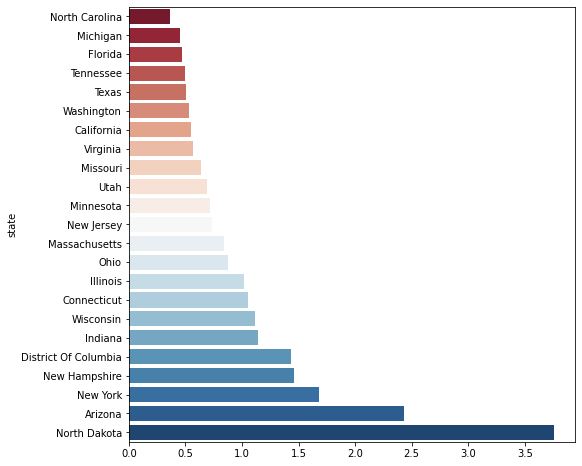

In [31]:
# Find States with highest & lowest Percentage Accesss
plt.figure(figsize=(8,8))
# Engagement_by_pct_access = pd.merge(new_engagement[['dist_id','pct_access']], district[['dist_id','state']], left_on = 'dist_id', right_on = 'dist_id', how = 'left').drop(columns = ('dist_id'))
Engagement_by_pct_access = pd.DataFrame(Engagement.groupby('state')['pct_access'].mean())
Engagement_by_pct_access = Engagement_by_pct_access.sort_values(['pct_access']).reset_index()

# Visualize Percentage Access by States
ax = sns.barplot(data= Engagement_by_pct_access, x = 'pct_access', y = "state", palette="RdBu")
# ax.set_ylabel('Percentage Access', labelpad = 21)
plt.xlabel('')
plt.show()

In [32]:
Engagement_by_pct_access.describe()

,pct_access
count,23.000000
mean,1.021615
std,0.770844
min,0.361143
25%,0.540647
50%,0.731896
75%,1.127188
max,3.759053


In [33]:
 #Get the lists of States with the lowest Percentage Access (< 25%) & Highest Percentage Access (> 75%)
low_access_tmp = Engagement_by_pct_access.loc[Engagement_by_pct_access['pct_access'] < 0.54]
low_access_list = low_access_tmp['state'].tolist()

high_access_tmp = Engagement_by_pct_access.loc[Engagement_by_pct_access['pct_access'] > 1.13]
high_access_list = high_access_tmp['state'].tolist()

#Get Top 7 Products details in States with the Lowest & Highest Percentage Access
top7_low_access = top7_list_details.loc[top7_list_details['state'].isin(low_access_list)]
top7_high_access = top7_list_details.loc[top7_list_details['state'].isin(high_access_list)]

top7_low_access.head(2)

,time,pct_access,engagement_index,Product Name,date_of_the_week,month,state
921520,2020-01-01,0.00,167.606264,Kahoot!,Wednesday,1,North Carolina
921525,2020-01-01,0.01,0.200000,Google Classroom,Wednesday,1,North Carolina


No handles with labels found to put in legend.


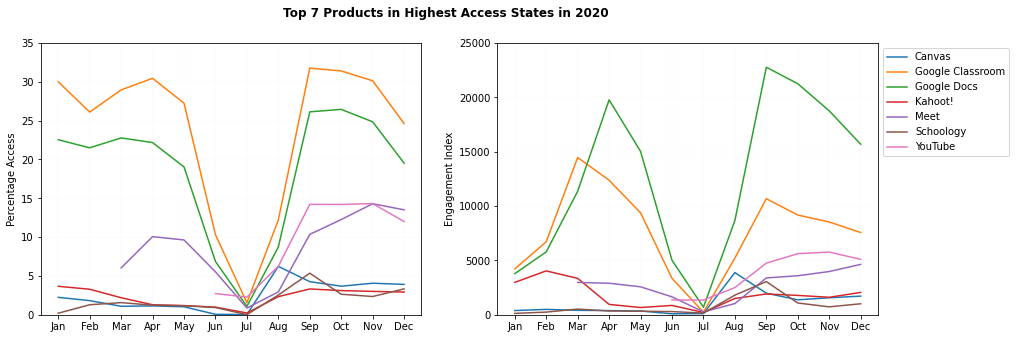

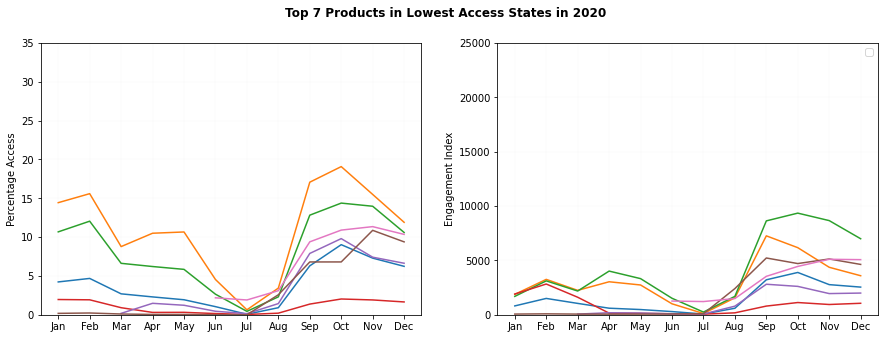

In [34]:
# EVALUATE TOP 7 PRODUCTS BY HIGHEST ACCESS VS LOWEST ACCESS STATES BY MONTH
#Get Top 7 Products details in States with the Lowest & Highest Percentage Access by Month
top7_low_access_monthly = top7_low_access.groupby(['Product Name','month'])[['pct_access','engagement_index']].mean()
top7_high_access_monthly = top7_high_access.groupby(['Product Name','month'])[['pct_access','engagement_index']].mean()

#Plot Highest Access States' Top 7 Most Popular Products' Percentage Access & Engagement Index by Month
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
ax = sns.lineplot(data= top7_high_access_monthly, x ='month', y = 'pct_access', hue = "Product Name", legend = None)
ax.set_xticklabels(['Jan','Feb', 'Mar','Apr','May','Jun','Jul', 'Aug','Sep', 'Oct','Nov', 'Dec'], rotation = 360)
ax.set_xticks(top7_close_ordered_monthly['month'].unique())
ax.grid(linewidth = 0.03)
ax.set_ylim(0,35)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access')

plt.subplot(122)
ax = sns.lineplot(data= top7_high_access_monthly, x ='month', y = 'engagement_index', hue = "Product Name")
ax.set_xticklabels(['Jan','Feb', 'Mar','Apr','May','Jun','Jul', 'Aug','Sep', 'Oct','Nov', 'Dec'], rotation = 360)
ax.set_xticks(top7_close_ordered_monthly['month'].unique())
plt.suptitle("Top 7 Products in Highest Access States in 2020", fontweight = 'bold')
ax.grid(linewidth = 0.03)
ax.set_ylim(0,25000)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement Index')


#Plot Lowest Access States' Top 7 Most Popular Products' Percentage Access & Engagement Index by Month
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
ax = sns.lineplot(data= top7_low_access_monthly, x ='month', y = 'pct_access', hue = "Product Name", legend = None)
ax.set_xticklabels(['Jan','Feb', 'Mar','Apr','May','Jun','Jul', 'Aug','Sep', 'Oct','Nov', 'Dec'], rotation = 360)
ax.set_xticks(top7_open_ordered_monthly['month'].unique())
ax.set_ylim(0,35)
ax.grid(linewidth = 0.03)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access')

plt.subplot(122)
ax = sns.lineplot(data= top7_low_access_monthly, x ='month', y = 'engagement_index', hue = "Product Name", legend = None)
ax.set_xticklabels(['Jan','Feb', 'Mar','Apr','May','Jun','Jul', 'Aug','Sep', 'Oct','Nov', 'Dec'], rotation = 360)
ax.set_xticks(top7_open_ordered_monthly['month'].unique())
plt.suptitle("Top 7 Products in Lowest Access States in 2020", fontweight = 'bold')
ax.grid(linewidth = 0.03)
ax.set_ylim(0,25000)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement Index')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


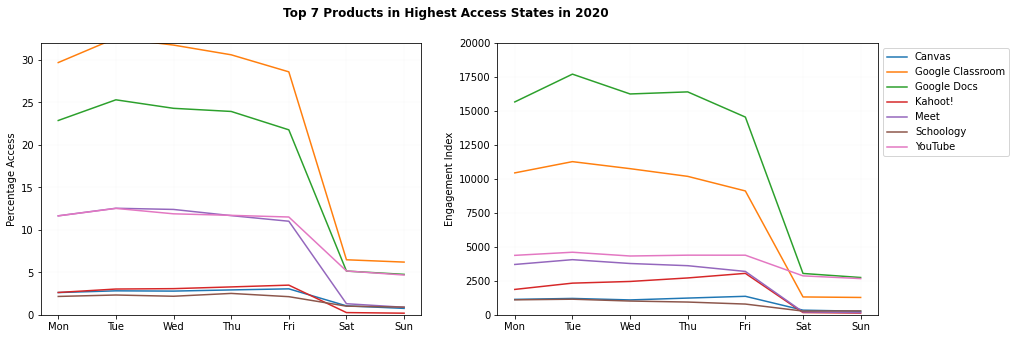

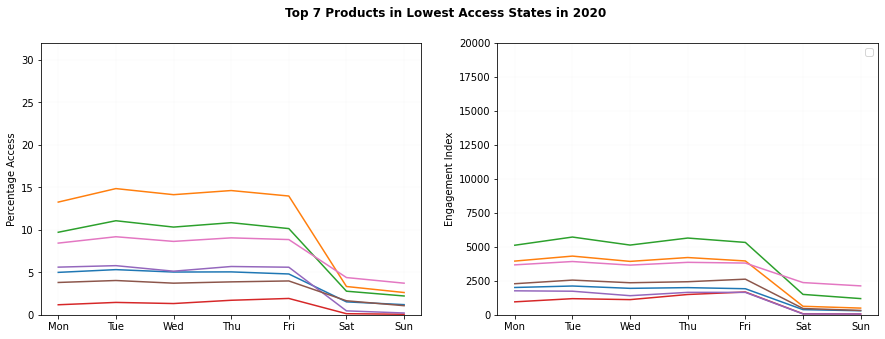

In [35]:
# EVALUATE TOP 7 PRODUCTS BY HIGHEST ACCESS VS LOWEST ACCESS STATES BY DATE OF THE WEEK
# Group Top 7 Most Popular Products' details in Highest Access & Lowest Access States by Date of the Week
top7_low_access_weekly = top7_low_access.groupby(['Product Name','date_of_the_week'])['pct_access','engagement_index'].mean().reset_index()
top7_high_access_weekly = top7_high_access.groupby(['Product Name','date_of_the_week'])['pct_access','engagement_index'].mean().reset_index()

# Sort Date of the Week to the correct order 
top7_low_access_weekly['date_of_the_week'] = pd.Categorical(top7_low_access_weekly.date_of_the_week ,categories= weekdays)
top7_low_access_weekly = top7_low_access_weekly.sort_values(['Product Name','date_of_the_week'])

top7_high_access_weekly['date_of_the_week'] = pd.Categorical(top7_high_access_weekly.date_of_the_week ,categories= weekdays)
top7_high_access_weekly = top7_high_access_weekly.sort_values(['Product Name','date_of_the_week'])

# Visualize Highest Access States' Top 7 Most Popular Products' Percentage Access & Engagement Index by Date of the Week
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
ax = sns.lineplot(data= top7_high_access_weekly, x ='date_of_the_week', y = 'pct_access', hue = "Product Name", legend = None, color = 'bright')
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.set_xticks(top7_open_ordered_weekly['date_of_the_week'].unique())
sns.color_palette("colorblind")
ax.grid(linewidth = 0.03)
ax.set_ylim(0,32)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access')

plt.subplot(122)
ax = sns.lineplot(data= top7_high_access_weekly, x = 'date_of_the_week', y = 'engagement_index', hue = "Product Name")
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.set_xticks(top7_open_ordered_weekly['date_of_the_week'].unique())
plt.suptitle("Top 7 Products in Highest Access States in 2020", fontweight = 'bold')
ax.grid(linewidth = 0.03)
ax.set_ylim(0,20000)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement Index')

# Visualize Lowest Access States' Top 7 Most Popular Products' Percentage Access & Engagement Index by Date of the Week
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
ax = sns.lineplot(data= top7_low_access_weekly, x ='date_of_the_week', y = 'pct_access', hue = "Product Name", legend = None)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.set_xticks(top7_close_ordered_weekly['date_of_the_week'].unique())
ax.set_ylim(0,32)
ax.grid(linewidth = 0.03)
ax.set_xlabel('')
ax.set_ylabel('Percentage Access')

plt.subplot(122)
ax = sns.lineplot(data= top7_low_access_weekly, x ='date_of_the_week', y = 'engagement_index', hue = "Product Name", legend = None)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 360)
ax.set_xticks(top7_close_ordered_weekly['date_of_the_week'].unique())
plt.suptitle("Top 7 Products in Lowest Access States in 2020", fontweight = 'bold')
ax.grid(linewidth = 0.03)
ax.set_ylim(0,20000)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('')
ax.set_ylabel('Engagement Index')

plt.show()

# **2.2.What is the impact of pct_access on quantitative factors relating to pp_total_raw and pct_black/hispanic ?**

**NOTATION**
*    **pct_access:** Percentage of students in the district have at least one page-load event of a given product and on a given day

*    **engagement_index:** Total page-load events per one thousand students of a given product and on a given day

*   **pct_black/Hispanic:** Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data 
   
*   **pp_total_raw:**  Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district. 












## **2.2.1. Assessment the Factors Between Accessing Percentage and Black-Hispanic Percentage via States**

In [36]:
Engagement_District.drop(columns = 'state_x', inplace = True)
Engagement_District.rename(columns = {'state_y' : 'state'}, inplace = True)
Engagement_District

,time,lp_id,pct_access,engagement_index,dist_id,Product Name,date_of_the_week,month,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,2020-01-27,32213.0,100.00,3000.000000,8815,Google Classroom,Monday,1,Illinois,Suburb,0.1,0.1,15000
1,2020-02-25,90153.0,33.33,2666.670000,8815,Netflix,Tuesday,2,Illinois,Suburb,0.1,0.1,15000
2,2020-02-25,99916.0,0.00,167.606264,8815,Google Drive,Tuesday,2,Illinois,Suburb,0.1,0.1,15000
3,2020-02-25,28504.0,0.00,167.606264,8815,Google Sheets,Tuesday,2,Illinois,Suburb,0.1,0.1,15000
4,2020-02-25,95731.0,33.33,333.330000,8815,Google Docs,Tuesday,2,Illinois,Suburb,0.1,0.1,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139696,2020-12-31,28504.0,0.05,10.460000,7164,Google Sheets,Thursday,12,California,City,0.7,0.7,1000
9139697,2020-12-31,69827.0,0.35,24.810000,7164,Google Sites,Thursday,12,California,City,0.7,0.7,1000
9139698,2020-12-31,52758.0,0.01,0.090000,7164,Adobe Character Animator,Thursday,12,California,City,0.7,0.7,1000
9139699,2020-12-31,61945.0,0.29,16.060000,7164,Zoom,Thursday,12,California,City,0.7,0.7,1000


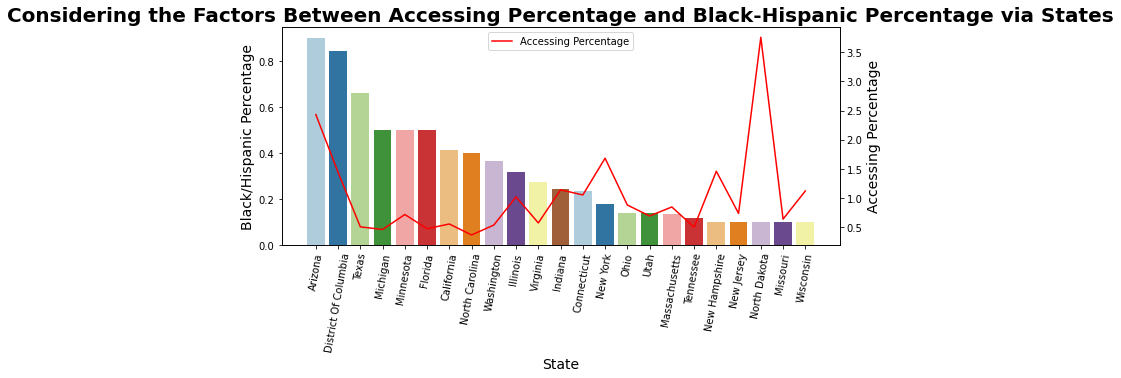

In [37]:
#####################################################  BarPlot and LinePlot for Accessing Percentage  ###############################################

# Visualize the Factors Between Accessing Percentage and Black-Hispanic Percentage via States

# Considering the Factors Between Accessing Percentage and Black-Hispanic Percentage via States

State_pct_Black_Hispanic_pct_Access_Mean = Engagement_District.groupby('state')[['pct_black/hispanic','pct_access']].mean().reset_index().sort_values('pct_black/hispanic', ascending = False)
State_pct_Black_Hispanic_pct_Access_Mean

plt.figure(figsize =(10,4))
plt.title('Considering the Factors Between Accessing Percentage and Black-Hispanic Percentage via States',size = 20, fontweight = 'bold')
sns.barplot( data = State_pct_Black_Hispanic_pct_Access_Mean,
            x = 'state',
            y = 'pct_black/hispanic',
            palette='Paired' 
            #color = '#69d' 
           )
plt.xlabel('State', size = 14)
plt.ylabel('Black/Hispanic Percentage', size = 14)
plt.xticks(rotation = 80)

plt.twinx()

sns.lineplot( data = State_pct_Black_Hispanic_pct_Access_Mean,
            x = 'state',
            y = 'pct_access',
            color = 'red', 
            label = 'Accessing Percentage'
            )         
plt.legend(loc="upper center") 
plt.xlabel('State', size = 14)
plt.ylabel('Accessing Percentage', size = 14)
plt.savefig('Considering the Factors Between Accessing Percentage and Black-Hispanic Percentage via States.png', transparent=False, dpi=80, bbox_inches="tight")

**COMMENT:**

 Looking at these data and graph, there are some small conclusion as follows: 

   * The Black/Hispanic Percentage has tended to decrease via 
states from Arizona to Wisconsin. There are 6 stages which gain the Highest Mean Black/Hispanic Percentage level comprising of Arizona (0.9), District of Columbia (0.84), Texas (0.66), Michigan (0.5), Minnesota (0.50), and Florida (0.5).

   * In contrast, the Accessing Percentage has a considerable fluctuation. More specifically, this percentage is not really stable via States. There are 5 stages which achieve the highest Accessing Percentage level in the period of COVID-19 pandemic including North Dakota (3.76), Arizona (2.43), New York (1.68), New Hampshire (1.46), and District of Columbia (1.44).

   * The graph shown that the government has early executed the lock-down policy in these states leading to high accessing percentage. 

   * The Black/Hispanic percentage across States whether 
more or less, the Accessing Percentage almost at high level. It depends on the COVID-19 pandemic issues in States. 

   * Highest Mean Black/Hispanic Percentage is 0.9 in Arizona and Highest Mean Access Percentage is 3.76 in North Dakota.

* Lowest Mean Black/Hispanic Percentage is 0.1 in New Hampshire, New Jersey, North Dakota, Missouri, Wisconsin and Lowest Mean Access Percentage is 0.36 in North Carolina.   

*   One person can access many times.







## **2.2.2.Assessment the Factors Between Engagement Index and Black-Hispanic Percentage via States**

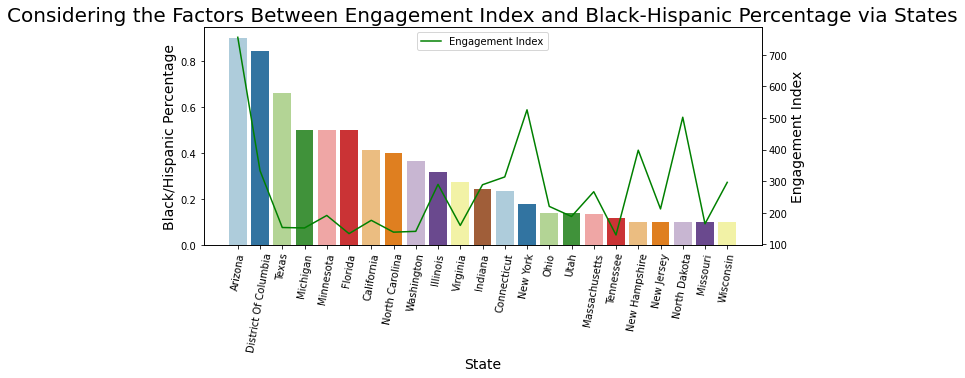

In [38]:
########################################################  BarPlot and LinePlot for Engagement Index ##################################################

# Visualize the Factors Between Engagement Index and Black-Hispanic Percentage via States

# Considering the Factors Between Engagement Index and Black-Hispanic Percentage via States

State_pct_Black_Hispanic_Engagement_Index_Mean = Engagement_District.groupby('state')[['pct_black/hispanic','engagement_index']].mean().reset_index().sort_values('pct_black/hispanic', ascending = False)
State_pct_Black_Hispanic_Engagement_Index_Mean

plt.figure(figsize =(10,4))
plt.title('Considering the Factors Between Engagement Index and Black-Hispanic Percentage via States',size = 20)
sns.barplot( data = State_pct_Black_Hispanic_Engagement_Index_Mean,
            x = 'state',
            y = 'pct_black/hispanic', 
            palette='Paired'
            #color = '#69d' 
           )
plt.xlabel('State', size = 14)
plt.ylabel('Black/Hispanic Percentage', size = 14)
plt.xticks(rotation = 80)

plt.twinx()

sns.lineplot( data = State_pct_Black_Hispanic_Engagement_Index_Mean,
            x = 'state',
            y = 'engagement_index',
            color = '#008000', 
            label = 'Engagement Index'
            )         
plt.legend(loc="upper center") 
plt.xlabel('State', size = 14)
plt.ylabel('Engagement Index', size = 14)
plt.savefig('Considering the Factors Between Ingagement Index and Black-Hispanic Percentage via States.png', transparent=False, dpi=80, bbox_inches="tight")

**COMMENT:**
  
   * Similar to the distribution of Black/Hispanic Percentage via States. There is a little bit variation at Engagement Index. 

   * More specifically, the Engagement Index has a significant fluctuation via States. There are 5 stages which achieve the highest Engagement Index level in the period of COVID-19 pandemic including Arizona (755.7), New York (526.2), North Dakota (502.7), New Hampshire (398.3), and District of Columbia (333.5).

   * The graph shown that the government has early executed the lock-down policy in these states leading to high Engagement Index. 

   * The Black/Hispanic Percentage across States whether more or less, the Engagement Index almost at high level. It depends on the COVID-19 pandemic issues in States. 

   * Highest Mean Black/Hispanic Percentage is 0.9 in Arizona and Highest Mean Engagement Index is ~= 755.7 in Arizona.

   * Lowest Mean Black/Hispanic Percentage is 0.1 in New Hampshire, New Jersey, North Dakota, Missouri, Wisconsin and Lowest Mean Engagement Index is ~= 130.1 in Tennessee.

   * One person can access many times.



## **2.2.3.Black/Hispanic Percentage Followed by States Basing on Accessing Percentage of Top 7 Highest Popular Products**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


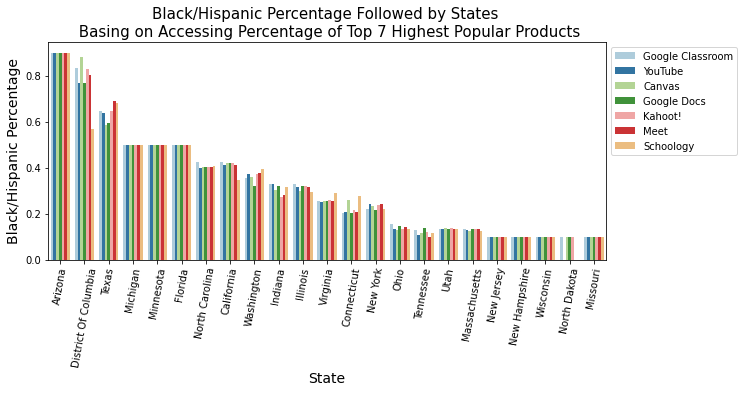

In [39]:
# Get Top 7 Most Popular Products Which is Based on The Mean Value of Accessing Percentage 
# on Black/Hispanic Percentage via States
Top_7_Products = Engagement_District.loc[Engagement_District['Product Name'].isin(top7_list)]
Top_7_Products_State_pct_Black_Hispanic_pct_Access_Mean = Top_7_Products.groupby(['state','Product Name'])['pct_access','pct_black/hispanic'].mean().reset_index().sort_values('pct_black/hispanic', ascending = False)
Top_7_Products_State_pct_Black_Hispanic_pct_Access_Mean

# Visualizing Black/Hispanic Percentage followed by states basing on top 7 highest popular products
plt.figure(figsize =(10,4))
plt.title('Black/Hispanic Percentage Followed by States \n Basing on Accessing Percentage of Top 7 Highest Popular Products',size = 15)
sns.barplot( data = Top_7_Products_State_pct_Black_Hispanic_pct_Access_Mean,
            x = 'state',
            y = 'pct_black/hispanic', 
            hue = 'Product Name',
            palette='Paired'               
           )
plt.xlabel('State', size = 14)
plt.ylabel('Black/Hispanic Percentage', size = 14)
plt.xticks(rotation = 80)
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Black_Hispanic Percentage followed by states basing on top 7 highest popular products.png', transparent=False, dpi=80, bbox_inches="tight")


**COMMENT:**

*  
The Highest Mean Access Percentage of Black/Hispanic people 
on most popular product is 33.31% (Google Classroom) in State of North Dakota while the Black/Hispanic Percentage only achieve at level of 0.1.

*   One person can access many times on the same a  product.




## **2.2.4.Black/Hispanic Percentage Followed by Locale Basing on Accessing Percentage of Top 7 Highest Popular Products**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


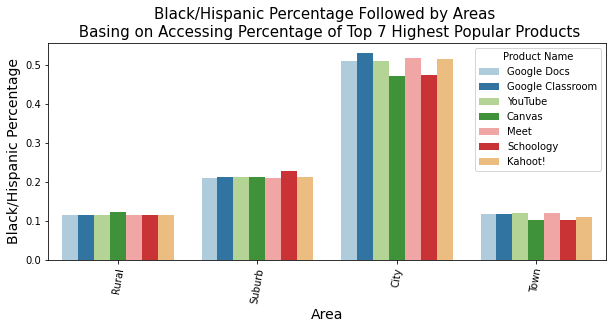

In [40]:
# Get Top 7 Most Popular Products Which is Based on The Mean Value of Accessing Percentage 
# on Black/Hispanic Percentage via Locale
Top_7_Products = Engagement_District.loc[Engagement_District['Product Name'].isin(top7_list)]
Top_7_Products_Locale_pct_Black_Hispanic_pct_Access_Mean = Top_7_Products.groupby(['locale','Product Name'])['pct_access','pct_black/hispanic'].mean().reset_index().sort_values('pct_access', ascending = False)
Top_7_Products_Locale_pct_Black_Hispanic_pct_Access_Mean

# Visualizing Black/Hispanic Percentage Followed by Locale Basing on Accessing Percentage of Top 7 Highest Popular Products
plt.figure(figsize =(10,4))
plt.title('Black/Hispanic Percentage Followed by Areas \n Basing on Accessing Percentage of Top 7 Highest Popular Products',size = 15)
sns.barplot( data = Top_7_Products_Locale_pct_Black_Hispanic_pct_Access_Mean,
            x = 'locale',
            y = 'pct_black/hispanic',
            hue = 'Product Name',
            palette='Paired'                
           )
plt.xlabel('Area', size = 14)
plt.ylabel('Black/Hispanic Percentage', size = 14)
plt.xticks(rotation = 80)
#plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Black_Hispanic Percentage Followed by Areas Basing on Accessing Percentage of Top 7 Highest Popular Products.png', transparent=False, dpi=80, bbox_inches="tight")

**COMMENT:**

- The Highest Mean Access Percentage of Black/Hispanic people on most popular products is 19.91 (Google Docs) and 19.70 (Google Classroom) in Rural. 
- The Black/Hispanic people in Rural (approximate 11.5%) has Highest Access Percentage.
  
  => The Access Percentage does not depend on the Black/Hispanic Percentage and one person can access many times per product.


## **2.2.5.Total Expenditure Followed by States Basing on Accessing Percentage of Top 7 Highest Popular Products**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


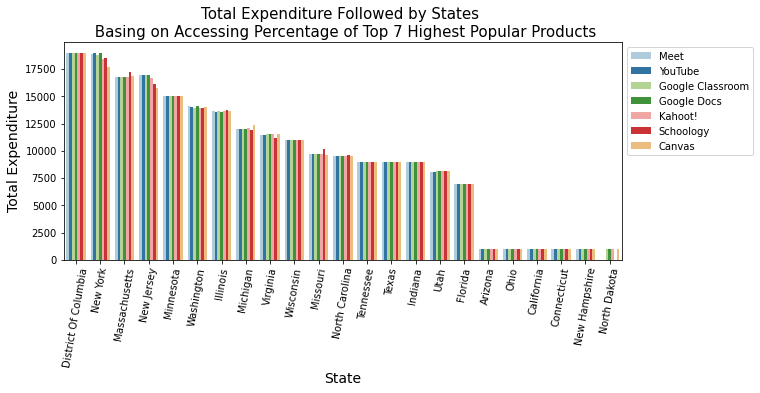

In [41]:
# Get Top 7 Most Popular Products Which is Based on The Mean Value of Accessing Percentage 
# on Total Expenditure via States
Top_7_Products = Engagement_District.loc[Engagement_District['Product Name'].isin(top7_list)]
Top_7_Products_State_pp_Total_Raw_pct_Access_Mean = Top_7_Products.groupby(['state','Product Name'])['pct_access','pp_total_raw'].mean().reset_index().sort_values('pp_total_raw', ascending = False)
Top_7_Products_State_pp_Total_Raw_pct_Access_Mean

# Visualizing Total Expenditure Followed by States Basing on Accessing Percentage of Top 7 Highest Popular Products
plt.figure(figsize =(10,4))
plt.title('Total Expenditure Followed by States \n Basing on Accessing Percentage of Top 7 Highest Popular Products',size = 15)
sns.barplot( data = Top_7_Products_State_pp_Total_Raw_pct_Access_Mean,
            x = 'state',
            y = 'pp_total_raw',
            hue = 'Product Name', 
            palette='Paired'              
           )
plt.xlabel('State', size = 14)
plt.ylabel('Total Expenditure', size = 14)
plt.xticks(rotation = 80)
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Total Expenditure Followed by States Basing on Accessing Percentage of Top 7 Highest Popular Products.png', transparent=False, dpi=80, bbox_inches="tight")

**COMMENT:**


 * Considering the total expenditure of using products, there are 5 States achieving highest index which is arranged respectively including District of Columbia, New York, Massachusetts, New Jersey, and Washington. On contrary, six States have the total expenditure on products at lowest level comprising of Arizona, California, Connecticut, New Hampshire, North Dakota and Ohio. Nevertheless, State of North Dakota has product expenditure level which is achieved 4 out of 7 products. Four those products are Canvas, Google Classroom, Google Docs, and Kahoot.

 * Total Expenditure on product can be high while Access Percentage on the same product can be low as well.

   =>  Total Expenditure does not depend on Access Percentage via States


## **2.2.6.Total Expenditure Followed by Locale Basing on Accessing Percentage of Top 7 Highest Popular Products**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


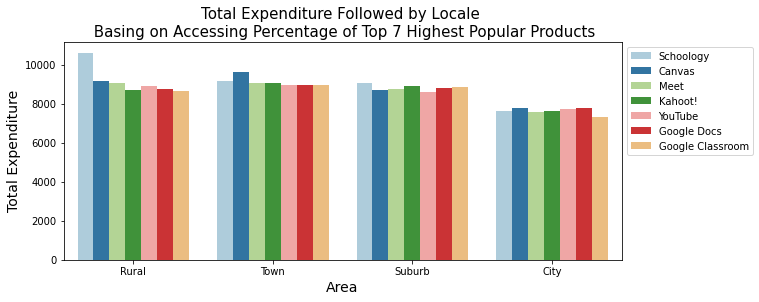

In [42]:
# Get Top 7 Most Popular Products Which is Based on The Mean Value of Accessing Percentage 
# on Total Expenditure via Locale
Top_7_Products = Engagement_District.loc[Engagement_District['Product Name'].isin(top7_list)]
Top_7_Products_Locale_pp_Total_Raw_pct_Access_Mean = Top_7_Products.groupby(['locale','Product Name'])['pct_access','pp_total_raw'].mean().reset_index().sort_values('pp_total_raw', ascending = False)
Top_7_Products_Locale_pp_Total_Raw_pct_Access_Mean

# Visualizing Total Expenditure Followed by Locale Basing on Accessing Percentage of Top 7 Highest Popular Products
plt.figure(figsize =(10,4))
plt.title('Total Expenditure Followed by Locale \n Basing on Accessing Percentage of Top 7 Highest Popular Products',size = 15)
sns.barplot( data = Top_7_Products_Locale_pp_Total_Raw_pct_Access_Mean,
            x = 'locale',
            y = 'pp_total_raw',
            hue = 'Product Name',
            palette='Paired'
           )
plt.xlabel('Area', size = 14)
plt.ylabel('Total Expenditure', size = 14)
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Total Expenditure Followed by Areas Basing on Accessing Percentage of Top 7 Highest Popular Products.png', transparent=False, dpi=80, bbox_inches="tight")

**COMMENT:**

City has the lowest total expenditure on the top products comparing to other areas. More specifically, all products in city has total expenditure lower than 8,000.

**GENERAL CONCLUSION**

1.  The Accessing Percentage and Engagement Index does not affect to distribution of Black/Hispanic Percentage via States. They are correlation from one another. 

2.  The Accessing Percentage and Engagement Index are high or low depending on Covid pandemic level at each State.

3.  States have the high access percentage in Covid-19 pandemic(2020), that was said that the Government has early executed locked-down policy and transferring offline learning manner to online. 

4.  The Product Accessing Percentage of Black/Hispanic people is different with Total Expenditure of product accessing percentage. 

5.  Cannot base on the Black/Hispanic percentage to illustrate the Covid-19 issues in States. Because some States are crowded, some States are few. In some States have White-people, Asian People, Red Indian, and so on. 

6.  Basing on the given data, pct_access (Percentage of students in the district have at least one page-load event of a given product and on a given day). This sentence demonstrates that there is no racism, history, politics, and basis of color. 

# **2.3 What is the Function of the top product to attract users? And Why the product is used most during covid - 19 outbreak?**

## **2.3.1 Create new table of product and engagement to find the relevant of product function with pct_access and engagement_index**

In [43]:
# Create product name table
product_name = product[['lp_id','Product Name','Main Category Function', 'Sub Category Function']]
product_name.reset_index(inplace = True)
product_name.drop(columns = 'index',inplace = True)

# Create new_engagement table by add new column 'Product Name'
new_engagement  = pd.merge(Engagement,product_name, how = 'left', on = 'lp_id')
new_engagement.dropna(inplace = True)

# Add new columns 'State'and 'locale'to new_engagement table
new_engagement  = pd.merge(new_engagement,district, how = 'left', on = 'dist_id')
new_engagement.dropna(inplace = True)

# Drop and rename columns
new_engagement.drop(columns = 'Product Name_x', inplace = True)
new_engagement.rename(columns = {'Product Name_y' : 'Product Name'}, inplace = True)
new_engagement

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,time,lp_id,pct_access,engagement_index,dist_id,date_of_the_week,month,state_x,Product Name,Main Category Function,Sub Category Function,state_y,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,2020-01-27,32213.0,100.00,3000.000000,8815,Monday,1,Illinois,Google Classroom,SDO,Learning Management Systems (LMS),Illinois,Suburb,0.1,0.1,15000
1,2020-02-25,90153.0,33.33,2666.670000,8815,Tuesday,2,Illinois,Netflix,LC,"Sites, Resources & Reference', 'Streaming Serv...",Illinois,Suburb,0.1,0.1,15000
2,2020-02-25,99916.0,0.00,167.606264,8815,Tuesday,2,Illinois,Google Drive,LC/CM/SDO,Other,Illinois,Suburb,0.1,0.1,15000
3,2020-02-25,28504.0,0.00,167.606264,8815,Tuesday,2,Illinois,Google Sheets,LC/CM/SDO,Other,Illinois,Suburb,0.1,0.1,15000
4,2020-02-25,95731.0,33.33,333.330000,8815,Tuesday,2,Illinois,Google Docs,LC,Content Creation & Curation,Illinois,Suburb,0.1,0.1,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139696,2020-12-31,28504.0,0.05,10.460000,7164,Thursday,12,California,Google Sheets,LC/CM/SDO,Other,California,City,0.7,0.7,1000
9139697,2020-12-31,69827.0,0.35,24.810000,7164,Thursday,12,California,Google Sites,SDO,"Data, Analytics & Reporting', 'Site Hosting & ...",California,City,0.7,0.7,1000
9139698,2020-12-31,52758.0,0.01,0.090000,7164,Thursday,12,California,Adobe Character Animator,LC,Content Creation & Curation,California,City,0.7,0.7,1000
9139699,2020-12-31,61945.0,0.29,16.060000,7164,Thursday,12,California,Zoom,CM,"Virtual Classroom', 'Video Conferencing & Scre...",California,City,0.7,0.7,1000


In [44]:
# Merging Engagement and Product Tables
Engagement_Product = pd.merge(Engagement.drop(columns = ['time','date_of_the_week','month']),
                              product[['lp_id','Primary Essential Function',	'Main Category Function',	'Sub Category Function']],
                              how = 'left',
                              on = 'lp_id')
Engagement_Product.fillna('No Information', inplace = True)
Engagement_Product.head(2)

,lp_id,pct_access,engagement_index,dist_id,Product Name,state,Primary Essential Function,Main Category Function,Sub Category Function
0,32213.0,100.00,3000.00,8815,Google Classroom,Illinois,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS)
1,90153.0,33.33,2666.67,8815,Netflix,Illinois,"LC - Sites, Resources & Reference - Streaming ...",LC,"Sites, Resources & Reference', 'Streaming Serv..."


In [45]:
# Create new column for main category function of product
# Function check main category function
def check_main(row):
  return row.split(' - ')[0]

# Function check sub category function
def check_sub(row):
  row = row.split(' - ')[1:len(row.split(' - '))]
  return str(row).strip('''['']''')

# Create the Function to check sub function 1
def check_sub1(row):
  return row.split(' & ')[0]

# Create the Function to check sub function 2
def check_sub2(row):
  if len(row.split(' & ')) == 2:
    return row.split(' & ')[1]
  else:
    return 'No Sub Function 2'
    
# Create the Function to check number of sub function and fill the full of main function
def num_func(row):
  if len(row.split(' & ')) == 1:
    return 'One Sub Function'
  else:
    return 'Two Sub Functions'

# Create the Function to check the full name of main function
def full_main_func(row):
  if row == 'LC':
    return  'Learning & Curriculum'
  elif row == 'CM':
    return 'Classroom Management'
  elif row == 'SDO':
    return 'School & District Operations'

# Create some new columns for Full Main Function, Number Sub Function, Sub Function 1, Sub Function 2
Engagement_Product['Full Main Function'] = Engagement_Product['Main Category Function'].apply(full_main_func)
Engagement_Product['Number Sub Function'] = Engagement_Product['Sub Category Function'].apply(num_func)
Engagement_Product['Sub Function 1'] = Engagement_Product['Sub Category Function'].apply(check_sub1)
Engagement_Product['Sub Function 2'] = Engagement_Product['Sub Category Function'].apply(check_sub2)
Engagement_Product.head(2)

,lp_id,pct_access,engagement_index,dist_id,Product Name,state,Primary Essential Function,Main Category Function,Sub Category Function,Full Main Function,Number Sub Function,Sub Function 1,Sub Function 2
0,32213.0,100.00,3000.00,8815,Google Classroom,Illinois,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),School & District Operations,One Sub Function,Learning Management Systems (LMS),No Sub Function 2
1,90153.0,33.33,2666.67,8815,Netflix,Illinois,"LC - Sites, Resources & Reference - Streaming ...",LC,"Sites, Resources & Reference', 'Streaming Serv...",Learning & Curriculum,Two Sub Functions,"Sites, Resources","Reference', 'Streaming Services"


In [46]:
New_Engagement_Product = Engagement_Product.drop(columns = ['lp_id', 'dist_id','Primary Essential Function','Main Category Function' ])

In [47]:
Top7_Engagement_Product = New_Engagement_Product[New_Engagement_Product['Product Name'].isin(top7_list)]

- LC = Learning & Curriculum
- CM = Classroom Management
- SDO = School & District Operations

## **2.3.2. Visualizing the relevant of the main function with pct_access and engegement_index**

In [48]:
# Creat the main_func table and main_func.csv file
main_func = Top7_Engagement_Product.groupby(['Product Name','Full Main Function'])[['pct_access', 'engagement_index','Number Sub Function']].mean().reset_index()
main_func['pct_engagement'] = round(main_func['engagement_index']/main_func['engagement_index'].sum()*100,1)
main_func.to_csv('main_func.csv')
main_func

,Product Name,Full Main Function,pct_access,engagement_index,pct_engagement
0,Canvas,Learning & Curriculum,5.728598,2202.881782,8.5
1,Google Classroom,School & District Operations,17.044563,5485.203971,21.1
2,Google Docs,Learning & Curriculum,16.048438,10672.336123,41.1
3,Kahoot!,Learning & Curriculum,1.793358,1387.972298,5.3
4,Meet,Classroom Management,6.560625,1805.816237,7.0
5,Schoology,School & District Operations,2.817799,1283.047593,4.9
6,YouTube,Learning & Curriculum,8.319705,3143.622045,12.1


<function matplotlib.pyplot.show>

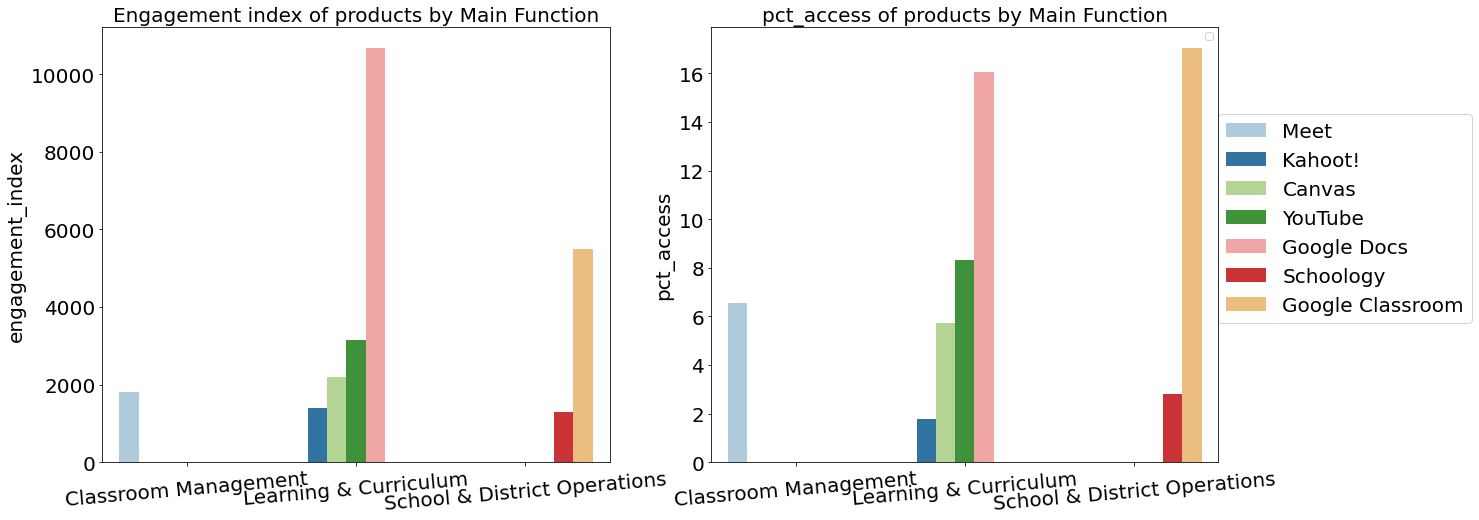

In [49]:
# Create barplot for engagement and pct_access of group_product by full main function

plt.figure(figsize = (20,8)) 
plt.subplot(121)
sns.barplot(data = main_func.sort_values(['Full Main Function','engagement_index'],ascending = True),
             x= 'Full Main Function',
             y = 'engagement_index',
            hue = 'Product Name',
            palette='Paired')
plt.xticks(rotation = 5,fontsize = 20)
plt.xlabel('', fontsize=20)
plt.yticks(fontsize= 20)
plt.ylabel('engagement_index', fontsize=20)
plt.legend(bbox_to_anchor=(2.7, 0.8), loc=1, borderaxespad=0, fontsize =20)
plt.title('Engagement index of products by Main Function', fontdict={'fontsize':20})
plt.subplot(122)
sns.barplot(data = main_func.sort_values(['Full Main Function','pct_access'],ascending = True),
             x= 'Full Main Function',
             y = 'pct_access',
            hue = 'Product Name',
            palette='Paired')
plt.xticks(rotation = 5,fontsize = 20)
plt.xlabel('', fontsize=20)
plt.ylabel('pct_access', fontsize=20)
plt.yticks(fontsize= 20)
plt.legend('')
plt.title('pct_access of products by Main Function', fontdict={'fontsize':20})

plt.show

<function matplotlib.pyplot.show>

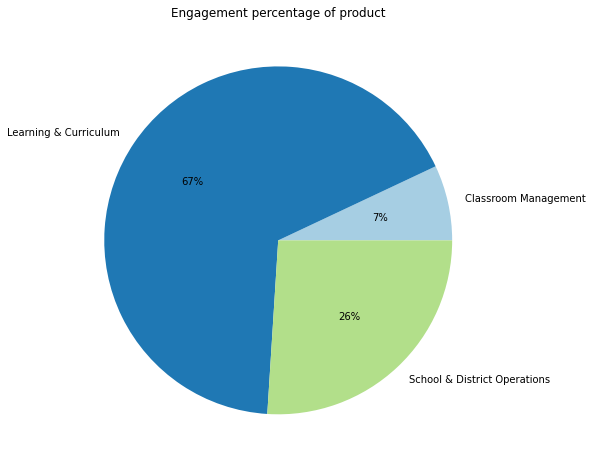

In [50]:
# Draw pie chart for percentage of engagement
p_main_func = pd.DataFrame(main_func.groupby('Full Main Function')['pct_engagement'].sum()).reset_index()
p_main_func.to_csv('p_main_func.csv')

plt.figure(figsize = (20,8)) 
plt.pie(p_main_func['pct_engagement'],
        labels = p_main_func['Full Main Function'],
        colors = sns.color_palette('Paired'),
        autopct='%.0f%%')
plt.title(f'Engagement percentage of product')
plt.show

- The top popularity product has the main function:  Learning and Curriculum, Class Management. 
- The School district Operation is attract the user if that product has the Ecosystem with other product has function Lear and Curriculum.

## **2.3.3. Visualizing the affect of number of sub functions to the product**

In [51]:
# Creat the num_sub_func table and num_sub_func.csv file
num_sub_func = Top7_Engagement_Product.groupby(['Product Name','Number Sub Function'])[['pct_access', 'engagement_index','Number Sub Function']].mean().reset_index()
num_sub_func['pct_engagement'] = round(num_sub_func['engagement_index']/num_sub_func['engagement_index'].sum()*100,1)
num_sub_func.to_csv('num_sub_func.csv')
num_sub_func

,Product Name,Number Sub Function,pct_access,engagement_index,pct_engagement
0,Canvas,Two Sub Functions,5.728598,2202.881782,8.5
1,Google Classroom,One Sub Function,17.044563,5485.203971,21.1
2,Google Docs,Two Sub Functions,16.048438,10672.336123,41.1
3,Kahoot!,One Sub Function,1.793358,1387.972298,5.3
4,Meet,Two Sub Functions,6.560625,1805.816237,7.0
5,Schoology,One Sub Function,2.817799,1283.047593,4.9
6,YouTube,Two Sub Functions,8.319705,3143.622045,12.1


<function matplotlib.pyplot.show>

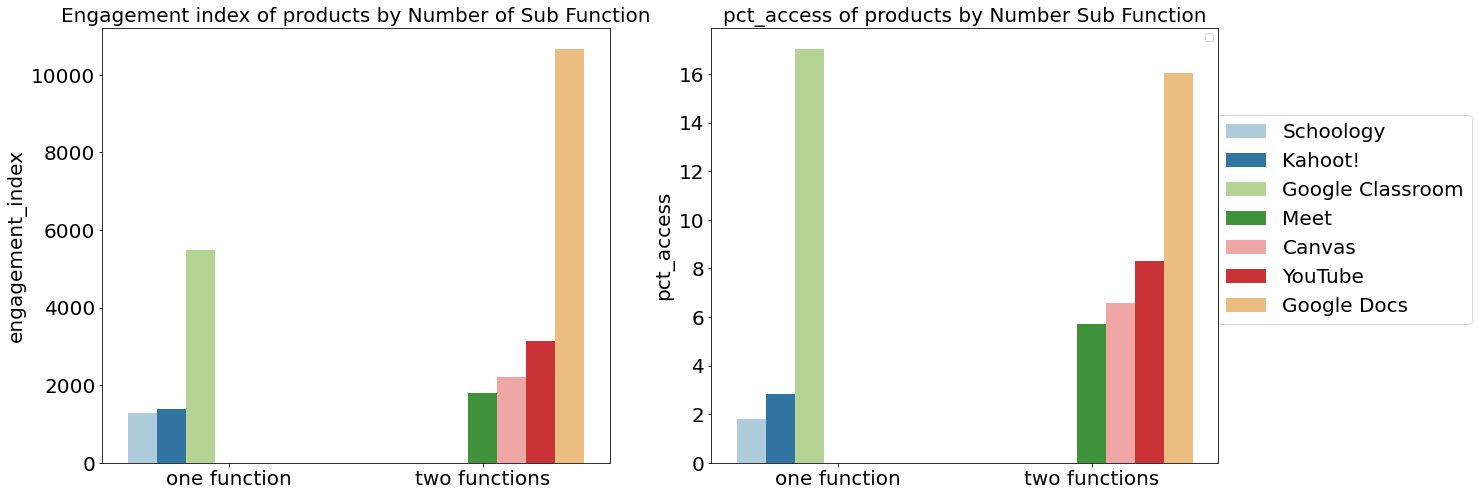

In [52]:
# Create barplot for engagement and pct_access of group_product by number of sub function
plt.figure(figsize = (20,8)) 
plt.subplot(121)
sns.barplot(data = num_sub_func.sort_values(['Number Sub Function','engagement_index'],ascending = True),
             x= 'Number Sub Function',
             y = 'engagement_index',
            hue = 'Product Name',
            palette='Paired')
plt.xticks([0,1], ['one function', 'two functions'], fontsize = 20)
plt.xlabel('', fontsize=20)
plt.ylabel('engagement_index', fontsize=20)
plt.yticks(fontsize= 20)
plt.legend(bbox_to_anchor=(2.7, 0.8), loc=1, borderaxespad=0, fontsize =20)

plt.title('Engagement index of products by Number of Sub Function', fontdict={'fontsize':20})
plt.subplot(122)
sns.barplot(data = num_sub_func.sort_values(['Number Sub Function','pct_access'],ascending = True),
             x= 'Number Sub Function',
             y = 'pct_access',
            hue = 'Product Name',
            palette='Paired')
plt.xticks([0,1], ['one function', 'two functions'], fontsize = 20)
plt.xlabel('', fontsize=20)
plt.ylabel('pct_access', fontsize=20)
plt.yticks(fontsize= 20)
plt.legend('')

plt.title('pct_access of products by Number Sub Function', fontdict={'fontsize':20})
plt.show

- The top popularity product has the main function:  The product has more sub function will get the more popular.
- The group product of google is the Ecosystem, these function of products is support together  the got the high access and engagement

<function matplotlib.pyplot.show>

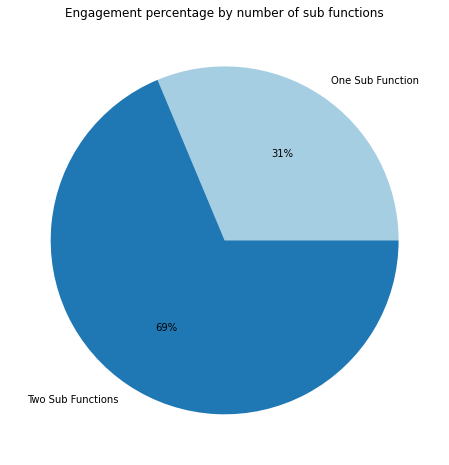

In [53]:
# Draw pie chart for percentage of engagement
p_num_sub_func = pd.DataFrame(num_sub_func.groupby('Number Sub Function')['pct_engagement'].sum()).reset_index()
p_num_sub_func.to_csv('p_num_sub_func.csv')

plt.figure(figsize = (20,8)) 
plt.pie(p_num_sub_func['pct_engagement'],
        labels = p_num_sub_func['Number Sub Function'],
        colors = sns.color_palette('Paired'),
        autopct='%.0f%%')
plt.title(f'Engagement percentage by number of sub functions')
plt.show

## **2.3.4. Find the relationship of Sub Function 1 with product**

In [54]:
# Creat the sub1_func table and sub1_func.csv file
sub1_func = Top7_Engagement_Product.groupby(['Product Name','Sub Function 1'])[['pct_access', 'engagement_index','Number Sub Function']].mean().reset_index()
sub1_func['pct_engagement'] = round(sub1_func['engagement_index']/sub1_func['engagement_index'].sum()*100,1)
sub1_func.to_csv('sub1_func.csv')
sub1_func

,Product Name,Sub Function 1,pct_access,engagement_index,pct_engagement
0,Canvas,Online Course Providers,5.728598,2202.881782,8.5
1,Google Classroom,Learning Management Systems (LMS),17.044563,5485.203971,21.1
2,Google Docs,Content Creation,16.048438,10672.336123,41.1
3,Kahoot!,Study Tools,1.793358,1387.972298,5.3
4,Meet,"Virtual Classroom', 'Video Conferencing",6.560625,1805.816237,7.0
5,Schoology,Learning Management Systems (LMS),2.817799,1283.047593,4.9
6,YouTube,"Sites, Resources",8.319705,3143.622045,12.1


<function matplotlib.pyplot.show>

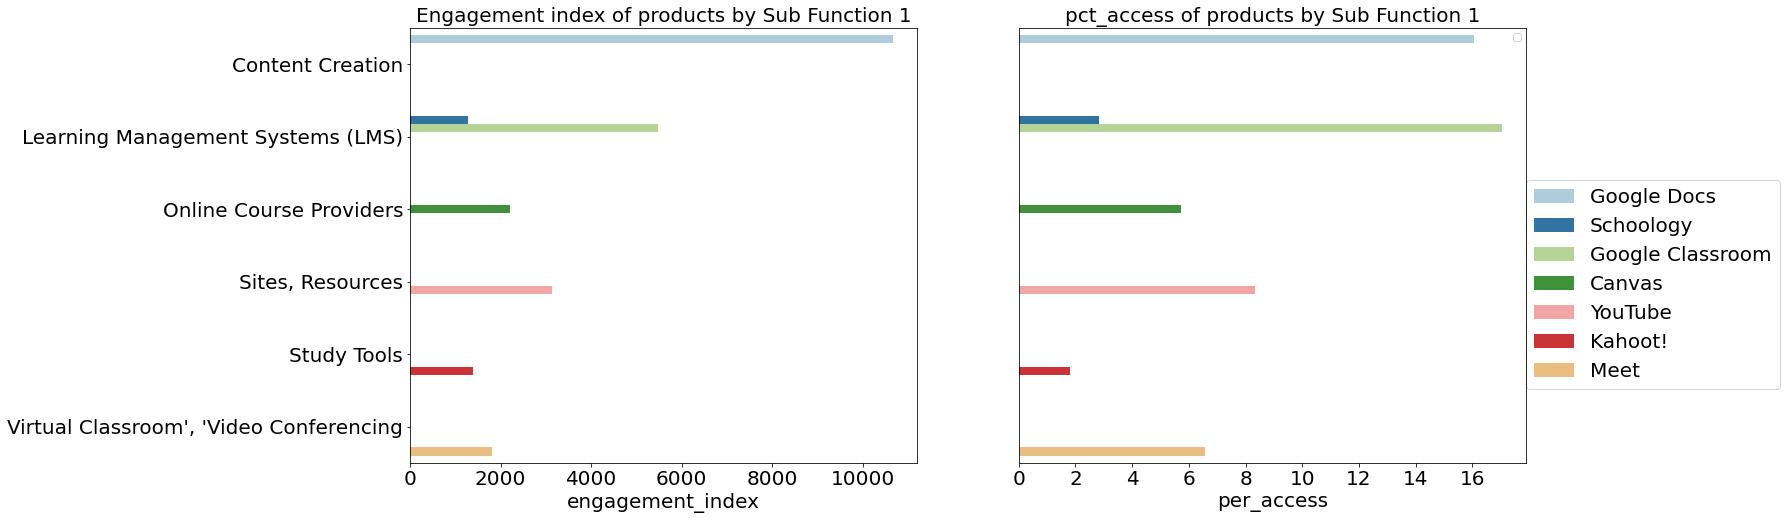

In [55]:
# Create barplot for engagement and pct_access of group_product by sub function 1
plt.figure(figsize = (20,8)) 
plt.subplot(121)
sns.barplot(data = sub1_func.sort_values(['Sub Function 1','engagement_index'],ascending = True),
             x= 'engagement_index',
             y = 'Sub Function 1',
            hue = 'Product Name',
            palette='Paired')

plt.xticks(rotation = 0,fontsize = 20)
plt.xlabel('engagement_index', fontsize=20)
plt.ylabel('', fontsize=20)
plt.yticks(fontsize = 20)
plt.title('Engagement index of products by Sub Function 1', fontdict={'fontsize':20})

plt.legend(bbox_to_anchor=(2.2,0.65), loc=2, borderaxespad=0, fontsize =20)

plt.subplot(122)
sns.barplot(data = sub1_func.sort_values(['Sub Function 1','pct_access'],ascending = True),
             x= 'pct_access',
             y = 'Sub Function 1',
            hue = 'Product Name',
            palette='Paired')
plt.xticks(rotation = 0, fontsize = 20)
plt.xlabel('per_access', fontsize=20)
plt.yticks([],'')
plt.ylabel('', fontsize=15)

plt.legend('')
plt.title('pct_access of products by Sub Function 1', fontdict={'fontsize':20})
plt.show

- Sub function: online course provider, content creation and Learning Management Systems of google Ecosystem is got the high access and engagement.
- Virtual Classroom of Meet and Video conferencing of Youtube also  attract the users

<function matplotlib.pyplot.show>

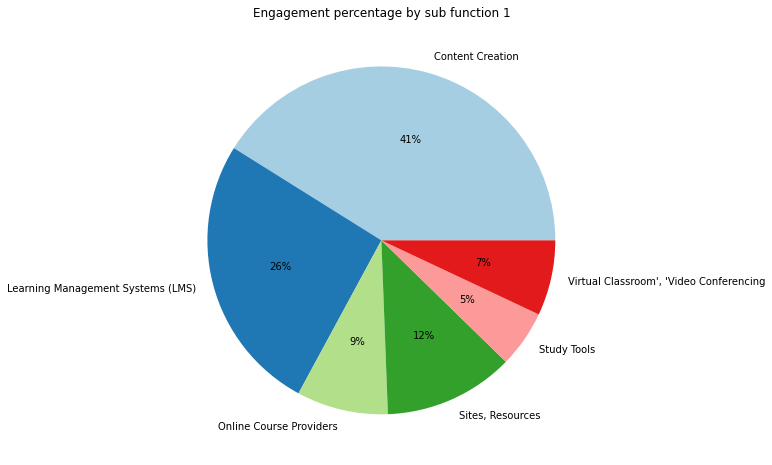

In [56]:
# Draw pie chart for percentage of engagement
p_sub1_func = pd.DataFrame(sub1_func.groupby('Sub Function 1')['pct_engagement'].sum()).reset_index()
p_sub1_func.to_csv('p_sub1_func.csv')

plt.figure(figsize = (20,8)) 
plt.pie(p_sub1_func['pct_engagement'],
        labels = p_sub1_func['Sub Function 1'],
        colors = sns.color_palette('Paired'),
        autopct='%.0f%%')
plt.title(f'Engagement percentage by sub function 1')
plt.show

## **2.3.5. Visualizing the affect of Sub Function 2 to attract the users**

In [57]:
# Creat the sub1_func table and sub2_func.csv file
sub2_func = Top7_Engagement_Product.groupby(['Product Name','Sub Function 2'])[['pct_access', 'engagement_index','Number Sub Function']].mean().reset_index()
sub2_func['pct_engagement'] = round(sub2_func['engagement_index']/sub2_func['engagement_index'].sum()*100,1)
sub2_func.to_csv('sub2_func.csv')
sub2_func

,Product Name,Sub Function 2,pct_access,engagement_index,pct_engagement
0,Canvas,Technical Skills Development,5.728598,2202.881782,8.5
1,Google Classroom,No Sub Function 2,17.044563,5485.203971,21.1
2,Google Docs,Curation,16.048438,10672.336123,41.1
3,Kahoot!,No Sub Function 2,1.793358,1387.972298,5.3
4,Meet,Screen Sharing,6.560625,1805.816237,7.0
5,Schoology,No Sub Function 2,2.817799,1283.047593,4.9
6,YouTube,"Reference', 'Streaming Services",8.319705,3143.622045,12.1


<function matplotlib.pyplot.show>

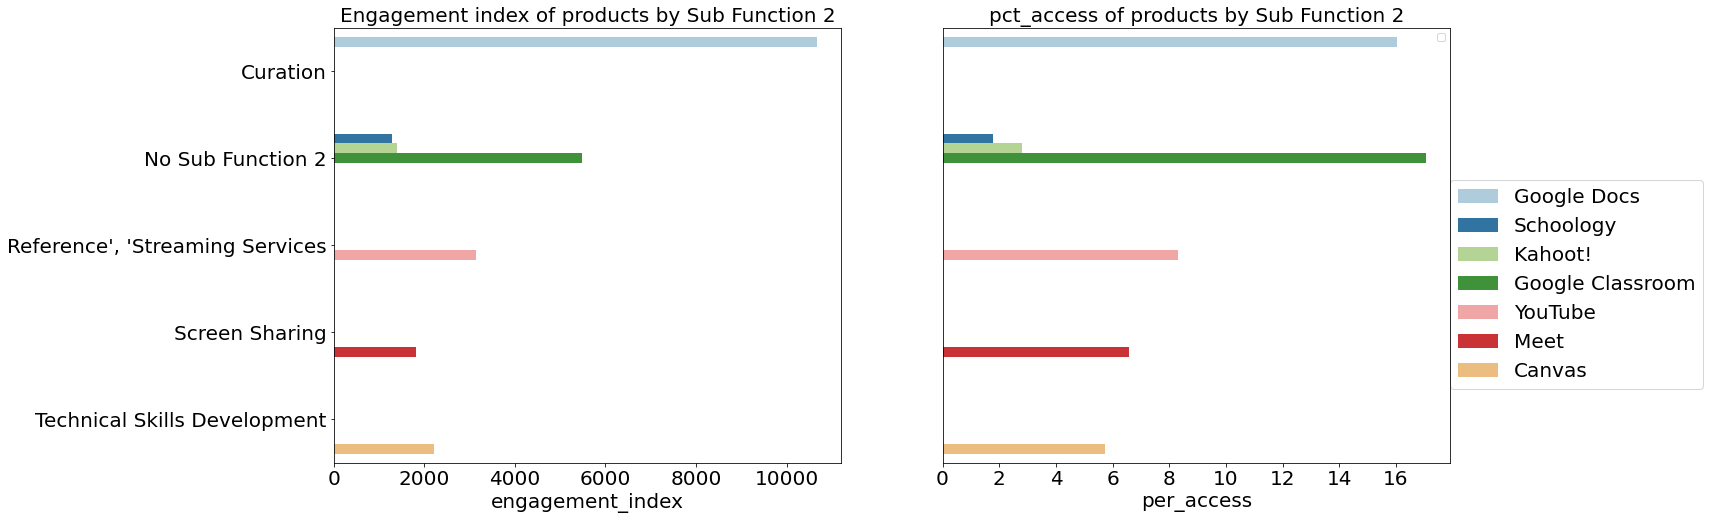

In [58]:
# Create barplot for engagement and pct_access of group_product by sub function 2
plt.figure(figsize = (20,8)) 
plt.subplot(121)
ax = sns.barplot(data = sub2_func.sort_values(['Sub Function 2','engagement_index'], ascending = True),
             x= 'engagement_index',
             y = 'Sub Function 2',
            hue = 'Product Name',
            palette='Paired')
ax.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation = 0,fontsize = 20)
plt.xlabel('engagement_index', fontsize=20)
plt.ylabel('', fontsize=20)
plt.yticks(fontsize= 20)
plt.title('Engagement index of products by Sub Function 2', fontdict={'fontsize':20})

plt.legend(bbox_to_anchor=(2.2,0.65), loc=2, borderaxespad=0, fontsize =20)

plt.subplot(122)
sns.barplot(data = sub2_func.sort_values(['Sub Function 2', 'pct_access'], ascending = True),
             x= 'pct_access',
             y = 'Sub Function 2',
            hue = 'Product Name',
            palette='Paired')
plt.xticks(rotation = 0, fontsize = 20)
plt.xlabel('per_access', fontsize=20)
plt.yticks([],'')
plt.ylabel('', fontsize=20)

plt.legend('')
plt.title('pct_access of products by Sub Function 2', fontdict={'fontsize':20})
plt.show

<function matplotlib.pyplot.show>

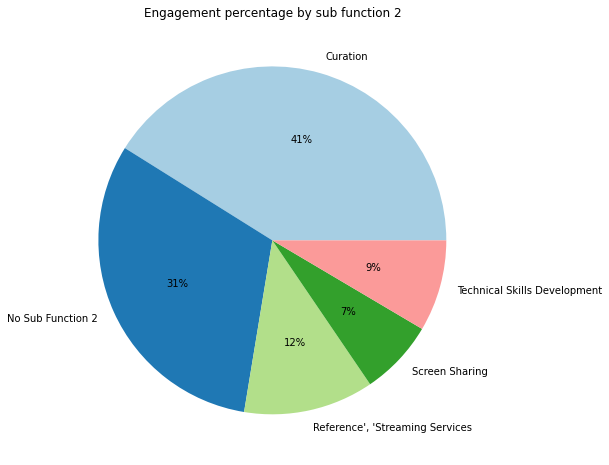

In [59]:
# Draw pie chart for percentage of engagement
p_sub2_func = pd.DataFrame(sub2_func.groupby('Sub Function 2')['pct_engagement'].sum()).reset_index()
p_sub2_func.to_csv('p_sub2_func.csv')

plt.figure(figsize = (20,8)) 
plt.pie(p_sub2_func['pct_engagement'],
        labels = p_sub2_func['Sub Function 2'],
        colors = sns.color_palette('Paired'),
        autopct='%.0f%%')
plt.title(f'Engagement percentage by sub function 2')
plt.show

-The products have more functions to attract high access of users.
-Technical Skills development, curation, streaming service, and reference got the attention of more people.

# **3. Summary of research**

**Over view**
Covid - 19 disease broke out at the end of 2019 and began to spread globally from the beginning of 2020. In 2020, the spread of covid is very fast. Confirmed cases and deaths are increasing rapidly day by day.
- To prevent the outbreak of Covid - 19, the US Government has taken some regular measures to keep social distance, promote research and development of Covid - 19 vaccine. From May - 2022 when The covid vaccine is announced and the vaccination program is promoted, the Covid-19 situation is generally under control.

**1. Impact of covid on digital learning during the Covid -19 outbreak**


**2. The complicated situation of covid - 19 and Social distancing  affects digital learning**



**3. Functions of top preferred products to attract users**
